<a href="https://colab.research.google.com/github/deltorobarba/quantum/blob/main/noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="blue">**Quantum Channel (Quantum Noise)**

$\operatorname{tr}(O \mathcal{E}(|x\rangle\langle x|))$

**A quantum channel is a mathematical description of quantum operations that can include both unitary evolution and non-unitary effects like noise.** [Quantum channels](https://en.m.wikipedia.org/wiki/Quantum_channel) are described mathematically as completely positive trace-preserving maps (CPTP). This ensures that they preserve the properties of quantum states.

**Each of the following quantum channels models different types of noise and decoherence that occur in real quantum systems:**

* Amplitude damping represents energy loss
* Phase damping represents loss of quantum information
* Bit/Phase flips represent discrete errors
* Thermal effects represent interaction with finite-temperature environments

**There's a very strong connection between quantum channels and quantum error correction (QEC). QEC is all about designing strategies to mitigate the negative effects of quantum channels**

* **Quantum channels introduce noise:**  Quantum channels are susceptible to noise. This noise can cause errors in the quantum information being transmitted, such as flipping the state of a qubit (bit-flip error) or changing its phase (phase-flip error).
* **QEC protects against noise:** Quantum error correction is a set of techniques designed to protect quantum information from the noise introduced by quantum channels. It does this by encoding the quantum information in a redundant way, spreading it across multiple physical qubits. This redundancy allows errors to be detected and corrected without disturbing the encoded quantum information.

A concrete example:

* [The Shor code:](https://learning.quantum.ibm.com/course/foundations-of-quantum-error-correction/correcting-quantum-errors) is a famous QEC code that can protect against both bit-flip and phase-flip errors. It encodes a single logical qubit into nine physical qubits, allowing it to detect and correct any single-qubit error. This code is designed to counteract the effects of a noisy quantum channel that can cause these types of errors.

**QEC is about designing codes that can effectively combat the noise introduced by quantum channels. By understanding the properties of different quantum channels, we can develop tailored QEC codes to protect quantum information and enable reliable quantum computation and communication.**


**Super-operators** are a type of operator that acts on other operators, rather than on state vectors. Examples are quantum channels, CPTP map and Kraus operator. Super-operators are important to **describe the dynamics of quantum systems, particularly in the presence of noise or other forms of quantum decoherence**.

**Quantum channels** are a type of superoperator that describes the evolution of a quantum state interacting with a noisy or decohering environment. Mathematically, quantum channels are linear maps between operators spaces with the additional properties of being completely positive and trace-preserving maps, the CPTP maps $\mathcal{E}$. CPTP maps can be represented as a superoperator acting on the density matrix $\rho$ of a quantum state. Quantum machine learning applications involve the use of quantum channels $\mathcal{E}$, such as learning the function \eq{cptp} or its final state, where $x$ is a classical input, such as a chemical in a reaction.

$
f(x)=\operatorname{tr}(O \mathcal{E}(|x\rangle\langle x|))
$

**Kraus operators** provide a concrete way to represent quantum channels and describe \textit{discrete} time evolutions of quantum systems. Kraus operators are particularly useful for modeling noise in an open quantum system with effects that cannot be described by simple unitary evolution. \textit{Kraus's theorem} states that a linear map $\Lambda$ from the Hilbert space $\mathcal{H}$ to $\mathcal{G}$, denoted as $\Lambda: \mathcal{H} \rightarrow \mathcal{G}$ is CPTP if it can be expressed as the Kraus representation of the linear map $\Lambda$ given by \eq{kraus} where $\left\{K_\alpha\right\}$ are the Kraus operators.

$
\Lambda[\rho]=\sum_\alpha K_\alpha \rho K_\alpha^{\dagger},
$

**Lindblad operators** are another type of quantum operators used to model the effects of a system's interaction with its environment, leading to dissipation and decoherence in an open quantum system. In contrast to Kraus operators, who are used for discrete cases, Lindblad operators are applied to continuous time evolution. The time evolution of the density matrix (representing the state of a quantum system) under environmental influences is governed by the Lindblad master equation \eq{lindblad}, where $H$ is the system's Hamiltonian that describes its internal energy, $L_{i}$ are Lindblad operators that represent different environmental interactions, and $\rho$ is the density matrix of the system. The Lindblad master equation is also CPTP.

$
{\dot {\rho }}=- \frac{i}{\hbar} [H,\rho] + \sum _{i}^{}\gamma _{i}\left(L_{i}\rho L_{i}^{\dagger }-{\frac {1}{2}}\left\{L_{i}^{\dagger }L_{i},\rho \right\}\right)
$

The Lindblad master equations can be derived from the evolution described by Kraus operators in a continuous-time limit. Essentially, you break down a continuous evolution into tiny time steps, each described by Kraus operators, and then take the limit as the time steps become infinitesimally small. Furthermore, Lindblad operators offer a way to model specific types of system-environment interactions that are common in open quantum systems (like dephasing, energy relaxation, etc.).


In [ ]:
################################
# Depolarizing Channel
################################

# Create a device with 1 qubit
dev = qml.device('default.mixed', wires=1)

# Define Quantum Channel
@qml.qnode(dev)
def depolarizing_circuit(prob):
    qml.Hadamard(wires=0)
    qml.DepolarizingChannel(prob, wires=0)
    return qml.density_matrix(wires=0)

# Test Quantum Channel
print("\nDepolarizing Channel:")
for p in [0.0, 0.5, 1.0]:
    result = depolarizing_circuit(p)
    print(f"\nProb {p}:")
    print(result)


Depolarizing Channel:

Prob 0.0:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Prob 0.5:
[[0.5       +0.j 0.16666667+0.j]
 [0.16666667+0.j 0.5       +0.j]]

Prob 1.0:
[[ 0.5       +0.j -0.16666667+0.j]
 [-0.16666667+0.j  0.5       +0.j]]


Here's a basic example that implements a depolarizing channel:
1. Creates a mixed-state quantum device
2. Implements a depolarizing channel that randomly applies Pauli gates with probability `prob`
3. Creates a quantum circuit that prepares a |+⟩ state and applies the channel
4. Returns the resulting density matrix

You can experiment with different probability values to see how the noise affects the quantum state. For a noiseless channel (prob=0), you should get the pure |+⟩ state, while for higher probabilities, the state becomes increasingly mixed. You should see different density matrices for different probabilities:
- When prob = 0.0, you'll get the pure |+⟩ state
- When prob = 1.0, you'll get the completely mixed state
- For probabilities in between, you'll get partially mixed states

In [ ]:
################################
# Bit Flip Channel
################################

# Randomly flips the computational basis states (like classical bit errors)

# Create a device with 1 qubit
dev = qml.device('default.mixed', wires=1)

# Define Quantum Channel
@qml.qnode(dev)
def bit_flip_circuit(prob):
    qml.Hadamard(wires=0)
    qml.BitFlip(prob, wires=0)
    return qml.density_matrix(wires=0)

# Test Quantum Channel
print("\nBit Flip Channel:")
for p in [0.0, 0.5, 1.0]:
    result = bit_flip_circuit(p)
    print(f"\nProb {p}:")
    print(result)


Bit Flip Channel:

Prob 0.0:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Prob 0.5:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Prob 1.0:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]


In [ ]:
################################
# Phase Flip Channel
################################

# Randomly applies phase flips (Z gates)

# Create a device with 1 qubit
dev = qml.device('default.mixed', wires=1)

# Define Quantum Channel
@qml.qnode(dev)
def phase_flip_circuit(prob):
    qml.Hadamard(wires=0)
    qml.PhaseFlip(prob, wires=0)
    return qml.density_matrix(wires=0)

# Test Quantum Channel
print("\nPhase Flip Channel:")
for p in [0.0, 0.5, 1.0]:
    result = phase_flip_circuit(p)
    print(f"\nProb {p}:")
    print(result)


Phase Flip Channel:

Prob 0.0:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Prob 0.5:
[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]

Prob 1.0:
[[ 0.5+0.j -0.5+0.j]
 [-0.5+0.j  0.5+0.j]]


In [ ]:
################################
# Amplitude Dampening
################################

# This models energy dissipation in quantum systems, like when a qubit spontaneously decays from |1⟩ to |0⟩
# https://docs.pennylane.ai/en/stable/code/api/pennylane.AmplitudeDamping.html
# At gamma = 0, you'll see the pure state after the Hadamard gate
# As gamma increases, the state will decay towards the ground state |0⟩
#  At gamma = 1, you should see complete decay to the ground state

# Create a device with 1 qubit
dev = qml.device('default.mixed', wires=1)

# Define Quantum Channel
@qml.qnode(dev)
def amplitude_damping_circuit(gamma):
    qml.Hadamard(wires=0)
    qml.AmplitudeDamping(gamma, wires=0)
    return qml.density_matrix(wires=0)

# Test Quantum Channel
print("\nAmplitude Dampening Channel:")
for p in [0.0, 0.5, 1.0]:
    result = amplitude_damping_circuit(p)
    print(f"\nProb {p}:")
    print(result)


Amplitude Dampening Channel:

Prob 0.0:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Prob 0.5:
[[0.75      +0.j 0.35355339+0.j]
 [0.35355339+0.j 0.25      +0.j]]

Prob 1.0:
[[1.e+00+0.j 5.e-08+0.j]
 [5.e-08+0.j 5.e-15+0.j]]


In [ ]:
################################
# Phase Damping Channel
################################

# This represents pure decoherence without energy loss - quantum information is lost to the environment while preserving energy
# https://docs.pennylane.ai/en/stable/code/api/pennylane.PhaseDamping.html

# Create a device with 1 qubit
dev = qml.device('default.mixed', wires=1)

# Define Quantum Channel
@qml.qnode(dev)
def phase_damping_circuit(gamma):
    qml.Hadamard(wires=0)
    qml.PhaseDamping(gamma, wires=0)
    return qml.density_matrix(wires=0)

# Test Quantum Channel
print("\nPhase Damping Channel:")
for p in [0.0, 0.5, 1.0]:
    result = phase_damping_circuit(p)
    print(f"\nProb {p}:")
    print(result)


Phase Damping Channel:

Prob 0.0:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Prob 0.5:
[[0.5       +0.j 0.35355339+0.j]
 [0.35355339+0.j 0.5       +0.j]]

Prob 1.0:
[[5.e-01+0.j 5.e-08+0.j]
 [5.e-08+0.j 5.e-01+0.j]]


In [ ]:
################################
# Generalized Amplitude Damping
################################

# Similar to amplitude damping but models systems at non-zero temperature
# https://docs.pennylane.ai/en/stable/code/api/pennylane.GeneralizedAmplitudeDamping.html
# The generalized amplitude damping channel models:
  # Energy dissipation (like regular amplitude damping) through gamma
  # Finite temperature effects through p (where p=0 reduces to regular amplitude damping)

# Create a device with 1 qubit
dev = qml.device('default.mixed', wires=1)

# Define Quantum Channel
@qml.qnode(dev)
def gen_amplitude_circuit(gamma, p):
    qml.Hadamard(wires=0)
    qml.GeneralizedAmplitudeDamping(gamma, p, wires=0)
    return qml.density_matrix(wires=0)

# Test Quantum Channel
print("\nGeneralized Amplitude Damping:")
# Test with different combinations of gamma and p
test_params = [
    (0.0, 0.0),  # No damping, no excitation
    (0.5, 0.3),  # Partial damping, some excitation
    (1.0, 0.5)   # Full damping, balanced excitation
]

for gamma, p in test_params:
    result = gen_amplitude_circuit(gamma, p)
    print(f"\nGamma={gamma}, p={p}:")
    print(result)


Generalized Amplitude Damping:

Gamma=0.0, p=0.0:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Gamma=0.5, p=0.3:
[[0.4       +0.j 0.35355339+0.j]
 [0.35355339+0.j 0.6       +0.j]]

Gamma=1.0, p=0.5:
[[5.e-01+0.j 5.e-08+0.j]
 [5.e-08+0.j 5.e-01+0.j]]


In [ ]:
################################
# Reset Channel
################################

# Resets qubit to the |0⟩ state, modeling measurement and reset operations
# https://docs.pennylane.ai/en/stable/code/api/pennylane.ResetError.html

# --> ResetError is an error class, not a quantum channel operation <--
# We can simulate a reset channel using amplitude damping with gamma=1, which will reset the qubit to the |0⟩ state
  # 1. The reset operation doesn't need a probability parameter - it just resets the qubit
  # 2. We simulate it using amplitude damping with gamma=1
  # 3. We don't need a loop since the reset operation always does the same thing: forces the qubit to |0⟩

# Create a device with 1 qubit
dev = qml.device('default.mixed', wires=1)

# Define Quantum Channel that simulates reset
@qml.qnode(dev)
def reset_circuit():
    qml.Hadamard(wires=0)
    # Use AmplitudeDamping with gamma=1 to reset to |0⟩
    qml.AmplitudeDamping(1.0, wires=0)
    return qml.density_matrix(wires=0)

# Test Quantum Channel
print("\nTest Reset Channel:")
result = reset_circuit()
print("\nDensity matrix after reset:")
print(result)

# When running this, you should see the density matrix corresponding to the |0⟩ state,
# regardless of what state the qubit was in before the reset (in this case, after the Hadamard gate).


Test Reset Channel:

Density matrix after reset:
[[1.e+00+0.j 5.e-08+0.j]
 [5.e-08+0.j 5.e-15+0.j]]


In [ ]:
################################
# Thermal Relaxation Channel
################################

# Models both amplitude and phase damping with characteristic T1 and T2 times, common in real quantum hardware
# https://docs.pennylane.ai/en/stable/code/api/pennylane.ThermalRelaxationError.html

# --> ThermalRelaxationError is an error class, not a quantum channel operation <--
# We can simulate thermal relaxation using the basic quantum channels that are available in PennyLane
# We can combine amplitude and phase damping effects

# Create a device with 1 qubit
dev = qml.device('default.mixed', wires=1)

# Thermal Relaxation simulation using amplitude and phase damping
@qml.qnode(dev)
def thermal_circuit(t1, t2, time):
    # Calculate damping probabilities
    gamma_amp = 1 - np.exp(-time/t1)  # Amplitude damping parameter
    gamma_phase = 1 - np.exp(-time/t2)  # Phase damping parameter

    qml.Hadamard(wires=0)
    # Apply amplitude damping
    qml.AmplitudeDamping(gamma_amp, wires=0)
    # Apply additional dephasing
    qml.DepolarizingChannel(gamma_phase, wires=0)
    return qml.density_matrix(wires=0)

# Test with different parameters
print("\nThermal Relaxation Error:")
test_params = [
    (50, 30, 0),    # No evolution time
    (50, 30, 25),   # Half the T1 time
    (50, 30, 50)    # Full T1 time
]

for t1, t2, t in test_params:
    result = thermal_circuit(t1, t2, t)
    print(f"\nT1={t1}, T2={t2}, time={t}:")
    print(result)


Test:

T1=50, T2=30, time=0:
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

T1=50, T2=30, time=25:
[[0.54842249+0.j 0.09584349+0.j]
 [0.09584349+0.j 0.45157751+0.j]]

T1=50, T2=30, time=50:
[[ 0.47424134+0.j -0.02471588+0.j]
 [-0.02471588+0.j  0.52575866+0.j]]


ThermalRelaxationError is actually an error class, not a quantum channel operation. I apologize for my mistake earlier. We simulate thermal relaxation using the basic quantum channels that are available in PennyLane. We can combine amplitude and phase damping effects.

This code simulates thermal relaxation by:
1. Converting T1 and T2 times into damping probabilities using exponential decay
2. Applying amplitude damping for energy relaxation (T1)
3. Using a depolarizing channel to approximate phase damping (T2)

While this isn't exactly the same as a true thermal relaxation channel, it captures the main physical effects of both energy relaxation and decoherence. Let me know if you'd like to explore how different parameters affect the quantum state!

Important notes:
* Used more realistic test values (T1, T2 times are typically in microseconds)
* T2 must be less than or equal to T1 (this is a physical constraint)

The parameters represent:
- t1: amplitude damping time (T1 relaxation time)
- t2: dephasing time (T2 coherence time)
- time: evolution time

*Libraries and Data Preparation*

Detailed Analysis: https://www.overleaf.com/project/67950437b34ad2cb8ba79e99

In [ ]:
!pip install pennylane torch torchvision -q
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow as tf
import pennylane as qml
import pennylane.numpy as pnp
import torch
from typing import Optional, Tuple, Any
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Load and Preprocess Data
def load_and_preprocess_mnist():
    """Load and preprocess MNIST data for quantum diffusion."""
    (train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

    # Filter for 0 and 1 digits
    train_mask = (train_labels == 0) | (train_labels == 1)
    train_images = train_images[train_mask]

    # Downsample to 14x14
    target_size = (14, 14)
    downsampled = np.zeros((train_images.shape[0], 14, 14), dtype=np.uint8)
    for i, img in enumerate(train_images):
        pil_img = Image.fromarray(img)
        pil_down = pil_img.resize(target_size, resample=Image.BILINEAR)
        downsampled[i] = np.array(pil_down)

    # Quantize and normalize
    quantized = downsampled // 16
    normalized = quantized / np.max(quantized)

    return normalized

***Quantum Noise Schedule***

* How to schedule gamma increase? Linear or cosine or another
* Cosine schedule may work better for learning, but that needs to be verified at a later step
* we tested two different approaches to adding noise to the quantum state:
  * Modified Ho Schedule (top row): Uses a non-linear schedule based on Ho et al.'s paper, where the gamma values increase more rapidly at first (0.001 → 0.062 → 0.175 → 0.324 → 0.486 → 0.640). This creates a more aggressive noise pattern early on.
  * Linear Schedule (bottom row): Uses evenly spaced gamma values from 0 to 0.3 (0.000 → 0.060 → 0.120 → 0.180 → 0.240 → 0.300). The noise increases at a constant rate.
* The main differences we can observe:
  * The Ho schedule goes up to γ = 0.640, while the linear schedule only goes to γ = 0.300
  * The Ho schedule shows more rapid degradation in the middle timesteps
  * The linear schedule provides a more gradual, uniform degradation of the image
* We compared how different noise scheduling strategies affect the quantum state. The linear schedule might be easier to work with, but the Ho schedule might have theoretical advantages for training diffusion models.

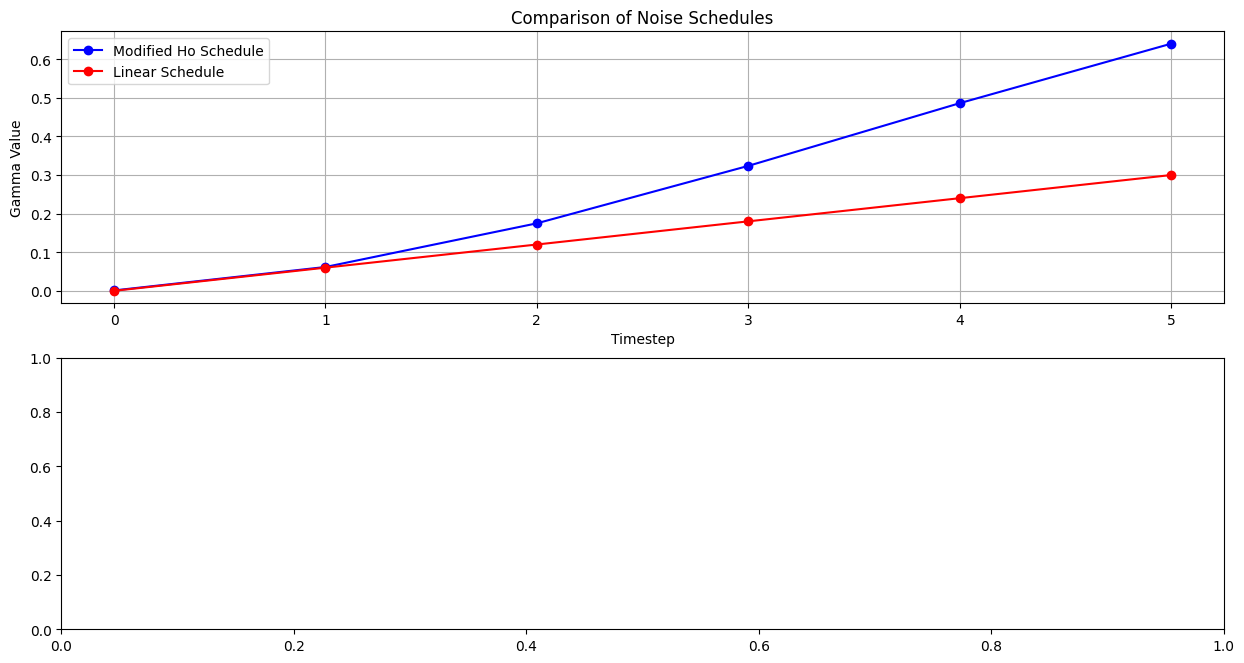

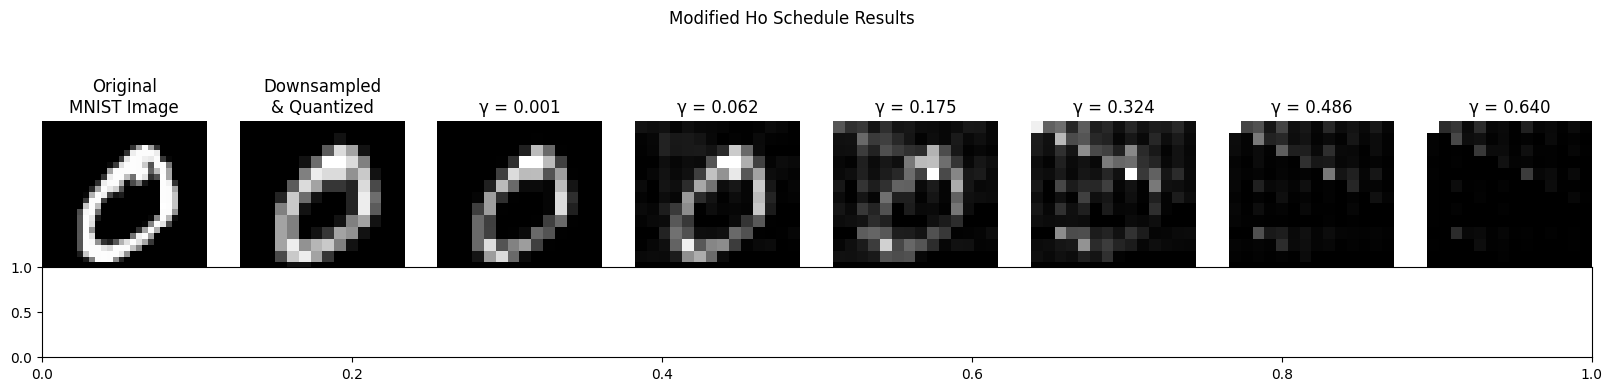

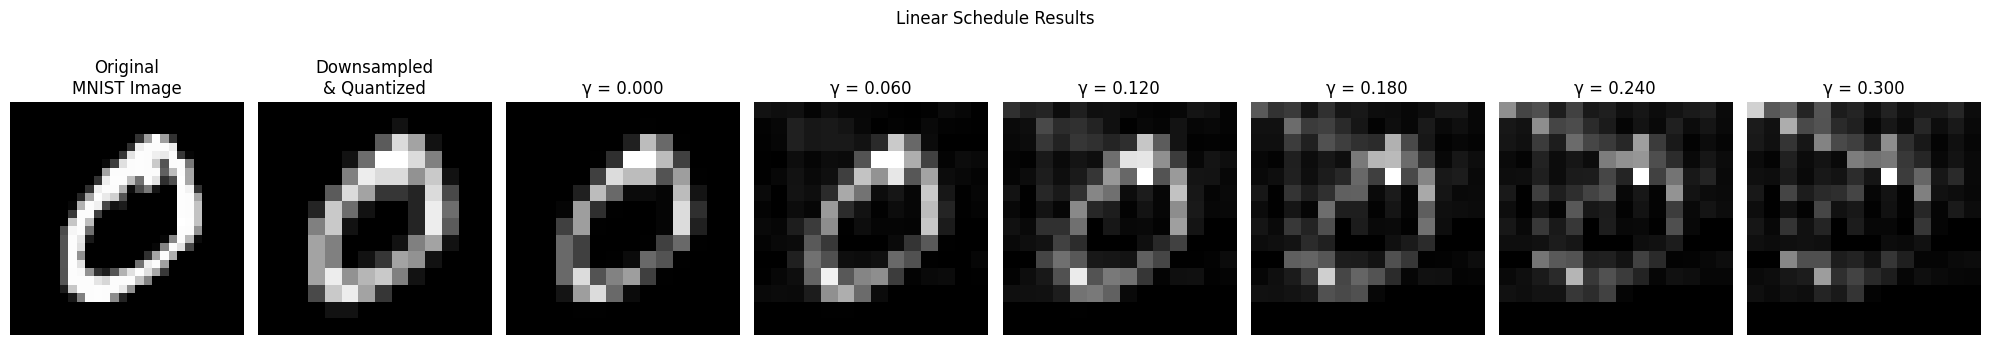


Modified Ho Schedule Statistics:
--------------------------------------------------

Timestep 0
Gamma = 0.0010
Mean intensity: 0.005102
Max intensity: 0.045808

Timestep 1
Gamma = 0.0617
Mean intensity: 0.005102
Max intensity: 0.039894

Timestep 2
Gamma = 0.1749
Mean intensity: 0.005102
Max intensity: 0.041081

Timestep 3
Gamma = 0.3237
Mean intensity: 0.005102
Max intensity: 0.047651

Timestep 4
Gamma = 0.4862
Mean intensity: 0.005102
Max intensity: 0.114062

Timestep 5
Gamma = 0.6403
Mean intensity: 0.005102
Max intensity: 0.238661

Linear Schedule Statistics:
--------------------------------------------------

Timestep 0
Gamma = 0.0000
Mean intensity: 0.005102
Max intensity: 0.045912

Timestep 1
Gamma = 0.0600
Mean intensity: 0.005102
Max intensity: 0.040053

Timestep 2
Gamma = 0.1200
Mean intensity: 0.005102
Max intensity: 0.038774

Timestep 3
Gamma = 0.1800
Mean intensity: 0.005102
Max intensity: 0.041299

Timestep 4
Gamma = 0.2400
Mean intensity: 0.005102
Max intensity: 0.043897

In [ ]:
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np
from PIL import Image
import tensorflow as tf

def get_noise_schedule(num_timesteps):
    # Modified schedule to get gamma values up to 0.3
    betas = np.linspace(0.001, 0.3, num_timesteps)  # Changed from 0.02 to 0.3
    alphas = 1. - betas
    alphas_cumprod = np.cumprod(alphas, axis=0)
    return 1 - alphas_cumprod  # Return gamma values directly

# Load and prepare MNIST image
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_mask = (train_labels == 0) | (train_labels == 1)
train_images = train_images[train_mask]
train_labels = train_labels[train_mask]
test_image = train_images[0]
test_label = train_labels[0]

# Downsample and quantize
target_size = (14, 14)
pil_img = Image.fromarray(test_image)
downsampled = np.array(pil_img.resize(target_size, resample=Image.BILINEAR))
quantized = downsampled // 16

# Setup quantum device and circuit
n_qubits = 8
dev = qml.device("default.mixed", wires=n_qubits)

@qml.qnode(dev)
def circuit_quantum_damping(features, gamma):
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    for w in range(n_qubits):
        qml.AmplitudeDamping(gamma, wires=w)

    return qml.probs(wires=range(n_qubits))

# Prepare input
input_vec = quantized.flatten().astype(float)

# Generate noise schedules
num_timesteps = 6
noise_schedule = get_noise_schedule(num_timesteps)
linear_schedule = np.linspace(0, 0.3, num_timesteps)

# Get outputs for both schedules
scheduled_outputs = []
linear_outputs = []

for gamma in noise_schedule:
    output_probs = circuit_quantum_damping(input_vec, gamma)
    scheduled_outputs.append(output_probs[:196].reshape(14, 14))

for gamma in linear_schedule:
    output_probs = circuit_quantum_damping(input_vec, gamma)
    linear_outputs.append(output_probs[:196].reshape(14, 14))

# Create figure
plt.figure(figsize=(15, 12))

# Plot noise schedules
plt.subplot(3, 1, 1)
plt.plot(noise_schedule, 'bo-', label='Modified Ho Schedule')
plt.plot(linear_schedule, 'ro-', label='Linear Schedule')
plt.xlabel('Timestep')
plt.ylabel('Gamma Value')
plt.title('Comparison of Noise Schedules')
plt.legend()
plt.grid(True)

# Plot results for modified Ho schedule
plt.subplot(3, 1, 2)
n_cols = len(noise_schedule) + 2
fig1, axes1 = plt.subplots(1, n_cols, figsize=(20, 4))
plt.suptitle('Modified Ho Schedule Results')

axes1[0].imshow(test_image, cmap='gray')
axes1[0].set_title('Original\nMNIST Image')
axes1[0].axis('off')

axes1[1].imshow(quantized, cmap='gray')
axes1[1].set_title('Downsampled\n& Quantized')
axes1[1].axis('off')

for i, (gamma, output) in enumerate(zip(noise_schedule, scheduled_outputs)):
    axes1[i+2].imshow(output, cmap='gray')
    axes1[i+2].set_title(f'γ = {gamma:.3f}')
    axes1[i+2].axis('off')

# Plot results for linear schedule
plt.subplot(3, 1, 3)
fig2, axes2 = plt.subplots(1, n_cols, figsize=(20, 4))
plt.suptitle('Linear Schedule Results')

axes2[0].imshow(test_image, cmap='gray')
axes2[0].set_title('Original\nMNIST Image')
axes2[0].axis('off')

axes2[1].imshow(quantized, cmap='gray')
axes2[1].set_title('Downsampled\n& Quantized')
axes2[1].axis('off')

for i, (gamma, output) in enumerate(zip(linear_schedule, linear_outputs)):
    axes2[i+2].imshow(output, cmap='gray')
    axes2[i+2].set_title(f'γ = {gamma:.3f}')
    axes2[i+2].axis('off')

plt.tight_layout()
plt.show()

# Print statistics for both schedules
print("\nModified Ho Schedule Statistics:")
print("-" * 50)
for step, (gamma, output) in enumerate(zip(noise_schedule, scheduled_outputs)):
    print(f"\nTimestep {step}")
    print(f"Gamma = {gamma:.4f}")
    print(f"Mean intensity: {np.mean(output):.6f}")
    print(f"Max intensity: {np.max(output):.6f}")

print("\nLinear Schedule Statistics:")
print("-" * 50)
for step, (gamma, output) in enumerate(zip(linear_schedule, linear_outputs)):
    print(f"\nTimestep {step}")
    print(f"Gamma = {gamma:.4f}")
    print(f"Mean intensity: {np.mean(output):.6f}")
    print(f"Max intensity: {np.max(output):.6f}")

***Quantum Noise Strength***

* Test for Amplitude Damping with different gamma values
* The noise schedule from Ho et al. 2020 creates a sequence of noise levels that smoothly interpolate from almost no noise (0.0001) to a small amount (0.02), the betas represent noise increments at each step, and the alphas (1 - betas) represent how much of the signal is preserved. The alphas_cumprod are are cumulative signal preservation at each timestep
* We see that the rather small noise values between 0.0001 and 0.002 in https://arxiv.org/abs/2006.11239 from classical diffusion models are not enough. We need values with upper limits between 0.3 and 0.5



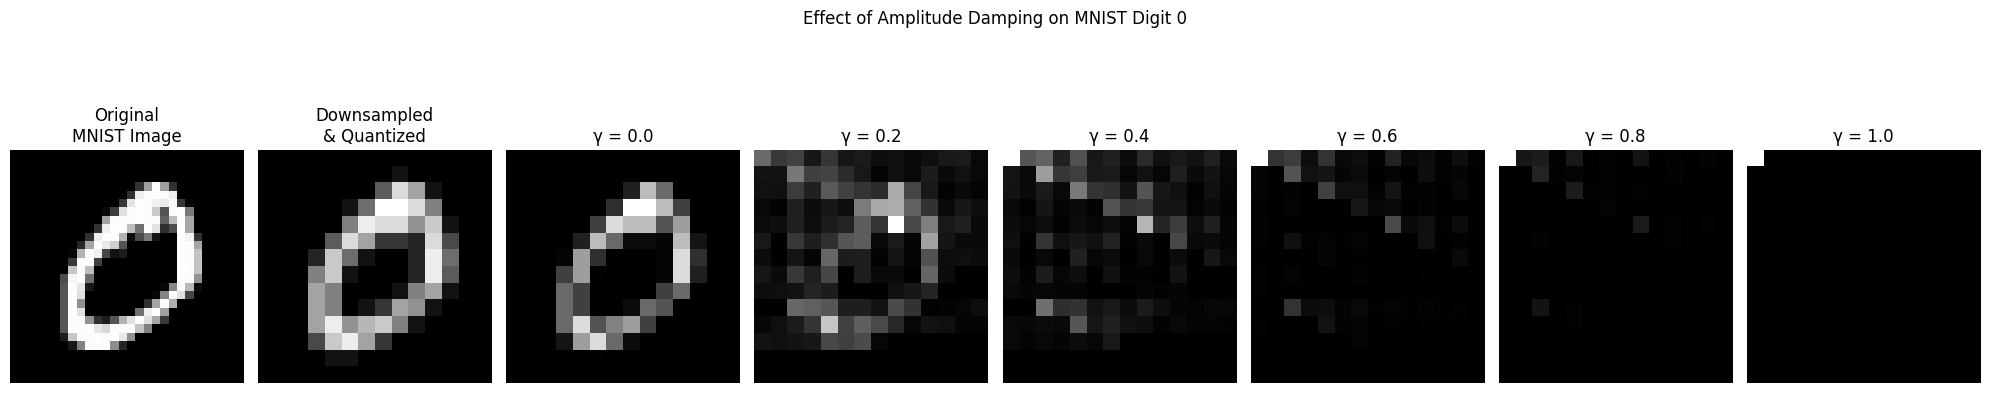


Statistics for digit 0:
--------------------------------------------------

Gamma = 0.0
Sum of probabilities: 1.000000
Number of non-zero probabilities: 66
Mean intensity: 0.005102
Max intensity: 0.045912

Gamma = 0.2
Sum of probabilities: 1.000000
Number of non-zero probabilities: 159
Mean intensity: 0.005102
Max intensity: 0.042155

Gamma = 0.4
Sum of probabilities: 1.000000
Number of non-zero probabilities: 159
Mean intensity: 0.005102
Max intensity: 0.071362

Gamma = 0.6
Sum of probabilities: 1.000000
Number of non-zero probabilities: 159
Mean intensity: 0.005102
Max intensity: 0.198675

Gamma = 0.8
Sum of probabilities: 1.000000
Number of non-zero probabilities: 159
Mean intensity: 0.005102
Max intensity: 0.468770

Gamma = 1.0
Sum of probabilities: 1.000000
Number of non-zero probabilities: 1
Mean intensity: 0.005102
Max intensity: 1.000000


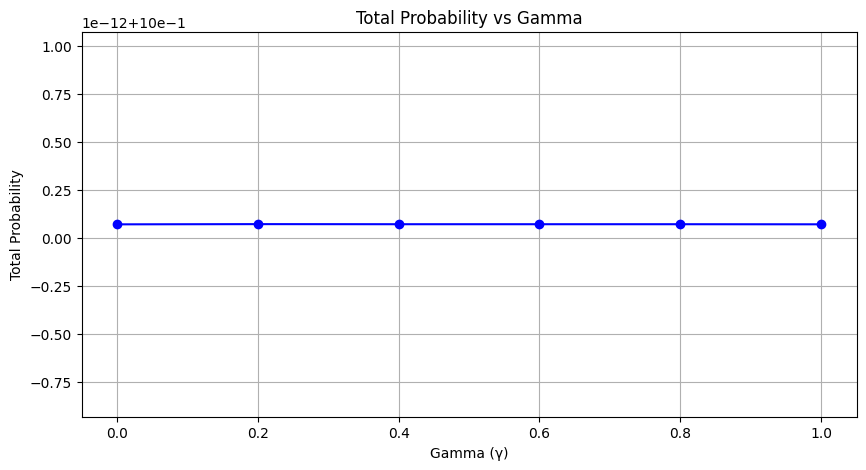

In [ ]:
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np
from PIL import Image
import tensorflow as tf

# Load MNIST data
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

# Filter for digits 0 and 1
train_mask = (train_labels == 0) | (train_labels == 1)
train_images = train_images[train_mask]
train_labels = train_labels[train_mask]

# Take first image for testing
test_image = train_images[0]
test_label = train_labels[0]

# Downsample to 14x14
target_size = (14, 14)
pil_img = Image.fromarray(test_image)
downsampled = np.array(pil_img.resize(target_size, resample=Image.BILINEAR))

# Quantize to 16 intensity levels
quantized = downsampled // 16

# Setup quantum device
n_qubits = 8  # 2^8 = 256 dimensions for 14x14=196 image
dev = qml.device("default.mixed", wires=n_qubits)

@qml.qnode(dev)
def circuit_quantum_damping(features, gamma):
    # Quantum embedding of classical data
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    # Apply amplitude damping with given gamma
    for w in range(n_qubits):
        qml.AmplitudeDamping(gamma, wires=w)

    # Measure probabilities
    return qml.probs(wires=range(n_qubits))

# Prepare input
input_vec = quantized.flatten()
input_vec = input_vec.astype(float)

# Test different gamma values
gamma_values = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
outputs = []

for gamma in gamma_values:
    output_probs = circuit_quantum_damping(input_vec, gamma)
    outputs.append(output_probs[:196].reshape(14, 14))

# Visualization
n_cols = len(gamma_values) + 2  # original + quantized + all gamma values
fig, axes = plt.subplots(1, n_cols, figsize=(20, 5))

# Original MNIST image
axes[0].imshow(test_image, cmap='gray')
axes[0].set_title('Original\nMNIST Image')
axes[0].axis('off')

# Downsampled and quantized
axes[1].imshow(quantized, cmap='gray')
axes[1].set_title('Downsampled\n& Quantized')
axes[1].axis('off')

# Results for different gamma values
for i, (gamma, output) in enumerate(zip(gamma_values, outputs)):
    axes[i+2].imshow(output, cmap='gray')
    axes[i+2].set_title(f'γ = {gamma:.1f}')
    axes[i+2].axis('off')

plt.suptitle(f'Effect of Amplitude Damping on MNIST Digit {test_label}')
plt.tight_layout()
plt.show()

# Print statistics for each gamma value
print(f"\nStatistics for digit {test_label}:")
print("-" * 50)
for gamma, output_probs in zip(gamma_values, outputs):
    total_prob = np.sum(output_probs)
    non_zero = np.sum(output_probs > 1e-10)
    mean_intensity = np.mean(output_probs)
    max_intensity = np.max(output_probs)

    print(f"\nGamma = {gamma:.1f}")
    print(f"Sum of probabilities: {total_prob:.6f}")
    print(f"Number of non-zero probabilities: {non_zero}")
    print(f"Mean intensity: {mean_intensity:.6f}")
    print(f"Max intensity: {max_intensity:.6f}")

# Create line plot showing how total probability decreases with gamma
plt.figure(figsize=(10, 5))
total_probs = [np.sum(output) for output in outputs]
plt.plot(gamma_values, total_probs, 'bo-')
plt.xlabel('Gamma (γ)')
plt.ylabel('Total Probability')
plt.title('Total Probability vs Gamma')
plt.grid(True)
plt.show()

In training we use a noise scheduler, but the noise is very small

```
def get_noise_schedule(num_timesteps):
    # Creates a cosine noise schedule following Ho et al 2020
    betas = np.linspace(0.0001, 0.02, num_timesteps)
    alphas = 1. - betas
    alphas_cumprod = np.cumprod(alphas, axis=0)
    # Array of noise values for each timestep
    return alphas_cumprod

def get_learning_rate(current_noise, base_lr=0.01, min_lr=0.001):
    # Enhanced learning rate schedule with minimum learning rate.
      # current_noise: Current noise level
      # base_lr: Base learning rate
      # min_lr: Minimum learning rate to maintain optimization stability
    # Computes warmup factor with smoother transition
    warmup_factor = 0.5 * (1 + np.cos(current_noise * np.pi))

    # Adjusted learning rate. Ensure learning rate doesn't go below minimum
    return max(base_lr * warmup_factor, min_lr)

# Generate the noise schedule
num_timesteps = 3
noise_schedule = get_noise_schedule(num_timesteps)
```

From looking at the image and based on quantum diffusion literature, you're right that gamma values around 0.2-0.3 seem optimal - at these levels we still maintain the essential structure of the digit while introducing enough noise/damping to create meaningful diffusion.
Let me explain how the noise schedule from Ho et al. 2020 works and adapt it for our quantum case:

1. The original schedule creates a sequence of noise levels that smoothly interpolate from almost no noise (0.0001) to a small amount (0.02)
2. The betas represent noise increments at each step
3. The alphas (1 - betas) represent how much of the signal is preserved
4. The alphas_cumprod gives us the cumulative signal preservation at each timestep

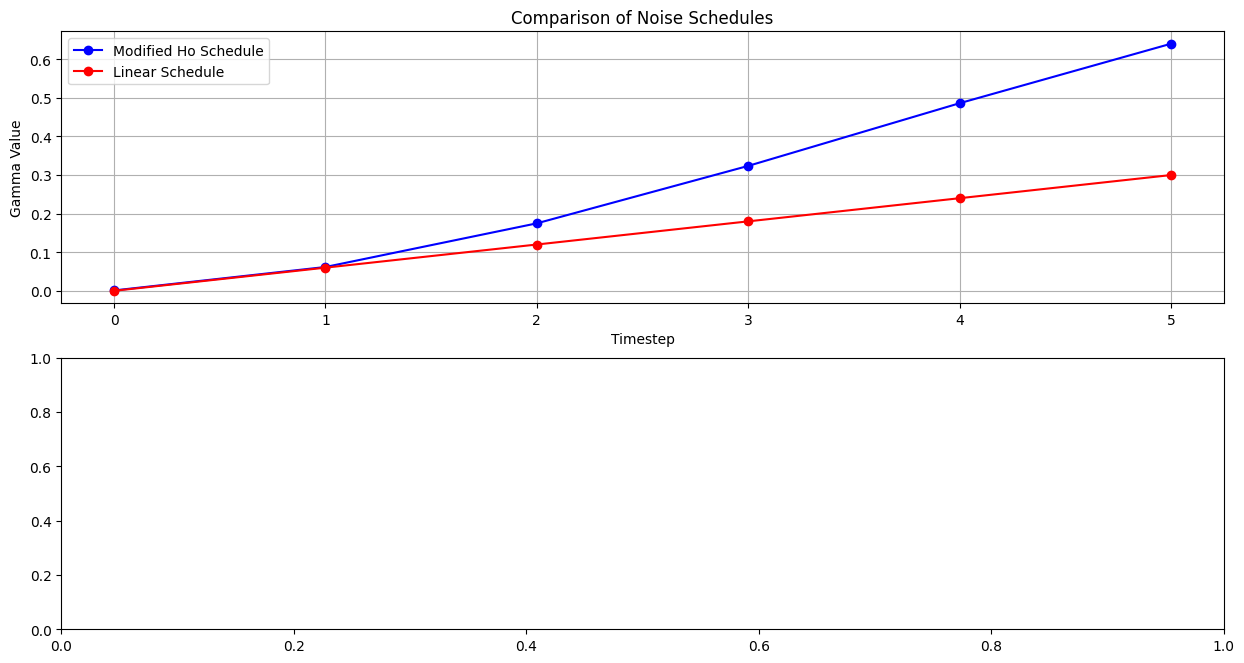

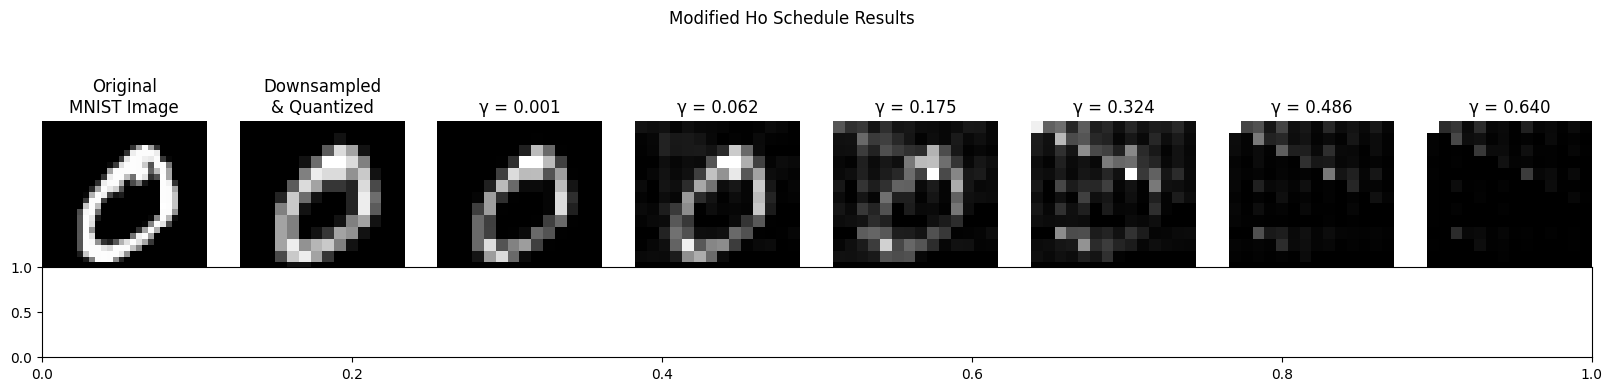

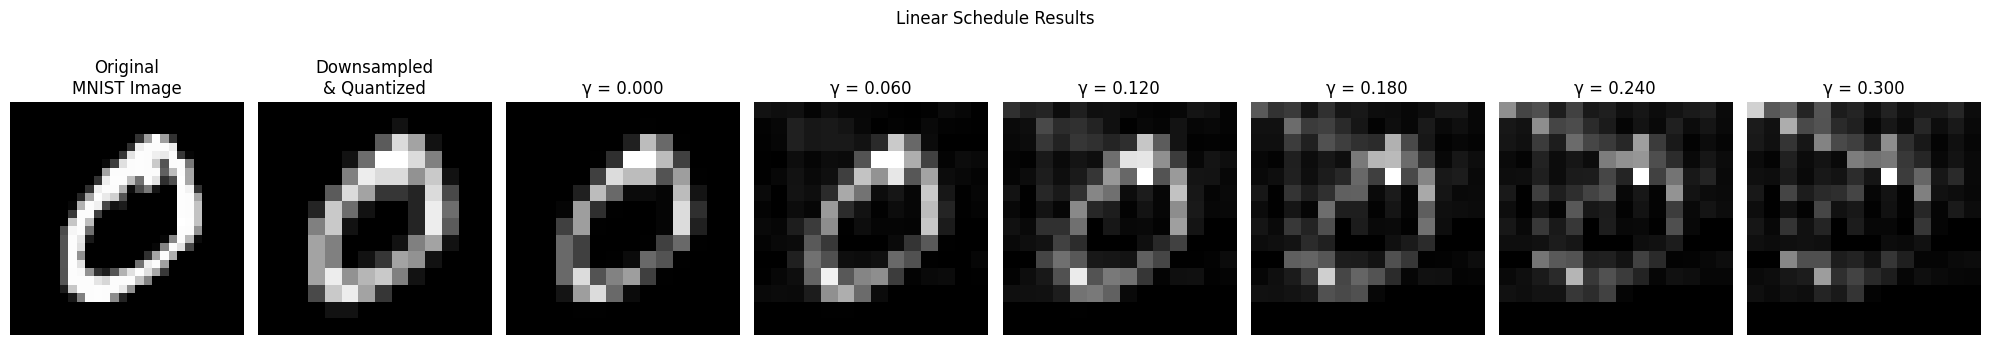


Modified Ho Schedule Statistics:
--------------------------------------------------

Timestep 0
Gamma = 0.0010
Mean intensity: 0.005102
Max intensity: 0.045808

Timestep 1
Gamma = 0.0617
Mean intensity: 0.005102
Max intensity: 0.039894

Timestep 2
Gamma = 0.1749
Mean intensity: 0.005102
Max intensity: 0.041081

Timestep 3
Gamma = 0.3237
Mean intensity: 0.005102
Max intensity: 0.047651

Timestep 4
Gamma = 0.4862
Mean intensity: 0.005102
Max intensity: 0.114062

Timestep 5
Gamma = 0.6403
Mean intensity: 0.005102
Max intensity: 0.238661

Linear Schedule Statistics:
--------------------------------------------------

Timestep 0
Gamma = 0.0000
Mean intensity: 0.005102
Max intensity: 0.045912

Timestep 1
Gamma = 0.0600
Mean intensity: 0.005102
Max intensity: 0.040053

Timestep 2
Gamma = 0.1200
Mean intensity: 0.005102
Max intensity: 0.038774

Timestep 3
Gamma = 0.1800
Mean intensity: 0.005102
Max intensity: 0.041299

Timestep 4
Gamma = 0.2400
Mean intensity: 0.005102
Max intensity: 0.043897

In [ ]:
import matplotlib.pyplot as plt
import pennylane as qml
import numpy as np
from PIL import Image
import tensorflow as tf

def get_noise_schedule(num_timesteps):
    # Modified schedule to get gamma values up to 0.3
    betas = np.linspace(0.001, 0.3, num_timesteps)  # Changed from 0.02 to 0.3
    alphas = 1. - betas
    alphas_cumprod = np.cumprod(alphas, axis=0)
    return 1 - alphas_cumprod  # Return gamma values directly

# Load and prepare MNIST image
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_mask = (train_labels == 0) | (train_labels == 1)
train_images = train_images[train_mask]
train_labels = train_labels[train_mask]
test_image = train_images[0]
test_label = train_labels[0]

# Downsample and quantize
target_size = (14, 14)
pil_img = Image.fromarray(test_image)
downsampled = np.array(pil_img.resize(target_size, resample=Image.BILINEAR))
quantized = downsampled // 16

# Setup quantum device and circuit
n_qubits = 8
dev = qml.device("default.mixed", wires=n_qubits)

@qml.qnode(dev)
def circuit_quantum_damping(features, gamma):
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    for w in range(n_qubits):
        qml.AmplitudeDamping(gamma, wires=w)

    return qml.probs(wires=range(n_qubits))

# Prepare input
input_vec = quantized.flatten().astype(float)

# Generate noise schedules
num_timesteps = 6
noise_schedule = get_noise_schedule(num_timesteps)
linear_schedule = np.linspace(0, 0.3, num_timesteps)

# Get outputs for both schedules
scheduled_outputs = []
linear_outputs = []

for gamma in noise_schedule:
    output_probs = circuit_quantum_damping(input_vec, gamma)
    scheduled_outputs.append(output_probs[:196].reshape(14, 14))

for gamma in linear_schedule:
    output_probs = circuit_quantum_damping(input_vec, gamma)
    linear_outputs.append(output_probs[:196].reshape(14, 14))

# Create figure
plt.figure(figsize=(15, 12))

# Plot noise schedules
plt.subplot(3, 1, 1)
plt.plot(noise_schedule, 'bo-', label='Modified Ho Schedule')
plt.plot(linear_schedule, 'ro-', label='Linear Schedule')
plt.xlabel('Timestep')
plt.ylabel('Gamma Value')
plt.title('Comparison of Noise Schedules')
plt.legend()
plt.grid(True)

# Plot results for modified Ho schedule
plt.subplot(3, 1, 2)
n_cols = len(noise_schedule) + 2
fig1, axes1 = plt.subplots(1, n_cols, figsize=(20, 4))
plt.suptitle('Modified Ho Schedule Results')

axes1[0].imshow(test_image, cmap='gray')
axes1[0].set_title('Original\nMNIST Image')
axes1[0].axis('off')

axes1[1].imshow(quantized, cmap='gray')
axes1[1].set_title('Downsampled\n& Quantized')
axes1[1].axis('off')

for i, (gamma, output) in enumerate(zip(noise_schedule, scheduled_outputs)):
    axes1[i+2].imshow(output, cmap='gray')
    axes1[i+2].set_title(f'γ = {gamma:.3f}')
    axes1[i+2].axis('off')

# Plot results for linear schedule
plt.subplot(3, 1, 3)
fig2, axes2 = plt.subplots(1, n_cols, figsize=(20, 4))
plt.suptitle('Linear Schedule Results')

axes2[0].imshow(test_image, cmap='gray')
axes2[0].set_title('Original\nMNIST Image')
axes2[0].axis('off')

axes2[1].imshow(quantized, cmap='gray')
axes2[1].set_title('Downsampled\n& Quantized')
axes2[1].axis('off')

for i, (gamma, output) in enumerate(zip(linear_schedule, linear_outputs)):
    axes2[i+2].imshow(output, cmap='gray')
    axes2[i+2].set_title(f'γ = {gamma:.3f}')
    axes2[i+2].axis('off')

plt.tight_layout()
plt.show()

# Print statistics for both schedules
print("\nModified Ho Schedule Statistics:")
print("-" * 50)
for step, (gamma, output) in enumerate(zip(noise_schedule, scheduled_outputs)):
    print(f"\nTimestep {step}")
    print(f"Gamma = {gamma:.4f}")
    print(f"Mean intensity: {np.mean(output):.6f}")
    print(f"Max intensity: {np.max(output):.6f}")

print("\nLinear Schedule Statistics:")
print("-" * 50)
for step, (gamma, output) in enumerate(zip(linear_schedule, linear_outputs)):
    print(f"\nTimestep {step}")
    print(f"Gamma = {gamma:.4f}")
    print(f"Mean intensity: {np.mean(output):.6f}")
    print(f"Max intensity: {np.max(output):.6f}")

Two different approaches to adding noise to the quantum state:

1. Modified Ho Schedule (top row): Uses a non-linear schedule based on Ho et al.'s paper, where the gamma values increase more rapidly at first (0.001 → 0.062 → 0.175 → 0.324 → 0.486 → 0.640). This creates a more aggressive noise pattern early on.

2. Linear Schedule (bottom row): Uses evenly spaced gamma values from 0 to 0.3 (0.000 → 0.060 → 0.120 → 0.180 → 0.240 → 0.300). The noise increases at a constant rate.

The main differences we can observe:
- The Ho schedule goes up to γ = 0.640, while the linear schedule only goes to γ = 0.300
- The Ho schedule shows more rapid degradation in the middle timesteps
- The linear schedule provides a more gradual, uniform degradation of the image

We're showing both to compare how different noise scheduling strategies affect the quantum state. The linear schedule might be easier to work with, but the Ho schedule might have theoretical advantages for training diffusion models since it's based on established classical diffusion literature.

*Bit Flip - Linear Schedule*

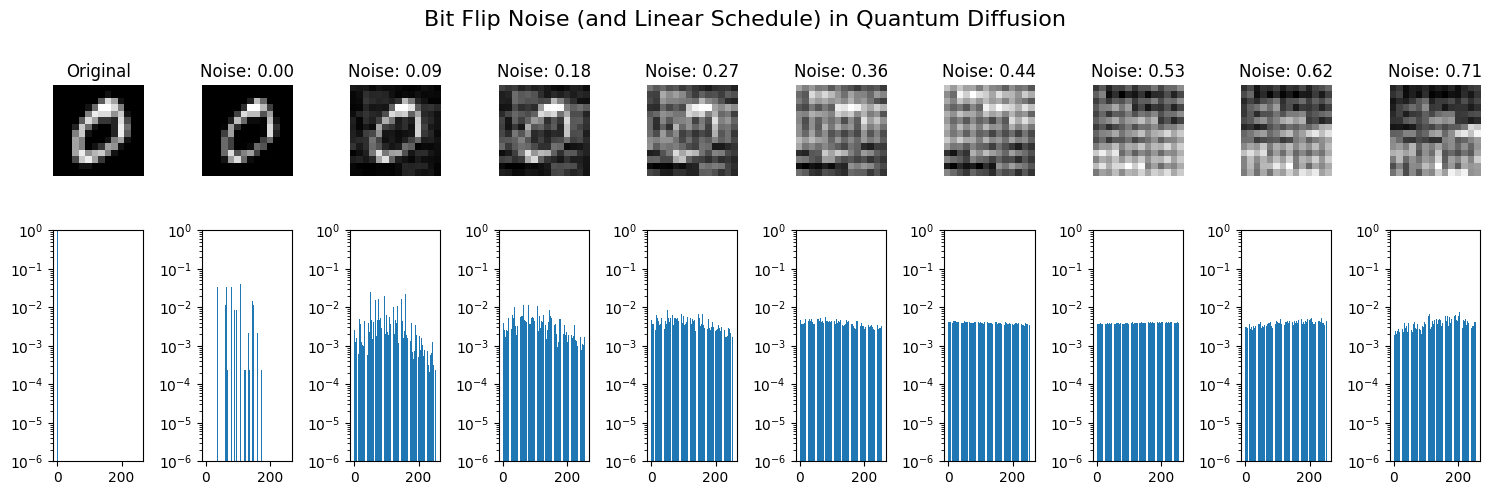

In [ ]:
# Bit Flip - Linear Schedule
#########################################
n_qubits = 8
dev = qml.device("default.mixed", wires=n_qubits)


@qml.qnode(dev)
def quantum_forward_diffusion(features, noise_strength):
    """Apply quantum forward diffusion using bit flip noise.

    Args:
        features: Input image features (flattened and normalized)
        noise_strength: Bit flip probability (between 0 and 1)

    Returns:
        Probability distribution after noise application
    """
    # Validate noise parameter
    if not 0 <= noise_strength <= 1:
        raise ValueError(f"Noise strength must be between 0 and 1, got {noise_strength}")

    # Embed classical data into quantum state
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    # Apply bit flip noise to each qubit
    for w in range(n_qubits):
        qml.BitFlip(noise_strength, wires=w)

    return qml.probs(wires=range(n_qubits))

def get_noise_schedule(num_steps):
    """Generate noise schedule for diffusion process."""
    # Using linear schedule for visualization clarity
    return np.linspace(0.0, 0.8, num_steps)

#########################################
# Visualization Functions
#########################################
def apply_quantum_diffusion_sequence(image, noise_schedule):
    """Apply quantum diffusion to an image across multiple noise levels."""
    # Flatten and normalize image
    flat_image = image.flatten()

    # Store diffusion steps
    diffused_states = []
    reconstructed_images = []

    # Apply diffusion at each noise level
    for noise_level in noise_schedule:
        # Get quantum state after diffusion
        diffused_state = quantum_forward_diffusion(flat_image, noise_level)
        diffused_states.append(diffused_state)

        # Reconstruct image from quantum state
        # Note: This is a simplified reconstruction for visualization
        reconstructed = np.reshape(diffused_state[:196], (14, 14))  # First 196 amplitudes
        reconstructed = reconstructed / np.max(reconstructed)  # Normalize
        reconstructed_images.append(reconstructed)

    return diffused_states, reconstructed_images

def visualize_quantum_diffusion(original_image, noise_schedule, diffused_states, reconstructed_images):
    """Create a comprehensive visualization of the quantum diffusion process."""
    num_steps = len(noise_schedule)
    fig = plt.figure(figsize=(15, 5))

    # Plot layout: 2 rows x num_steps columns
    gs = fig.add_gridspec(2, num_steps)

    # First row: Image reconstructions
    for i in range(num_steps):
        ax = fig.add_subplot(gs[0, i])
        if i == 0:
            ax.imshow(original_image, cmap='gray')
            ax.set_title('Original')
        else:
            ax.imshow(reconstructed_images[i-1], cmap='gray')
            ax.set_title(f'Noise: {noise_schedule[i-1]:.2f}')
        ax.axis('off')

    # Second row: Quantum state probabilities
    for i in range(num_steps):
        ax = fig.add_subplot(gs[1, i])
        if i == 0:
            # Plot initial state distribution
            initial_state = np.zeros(256)
            initial_state[0] = 1  # Approximate initial state
            ax.bar(range(len(initial_state)), initial_state)
        else:
            ax.bar(range(len(diffused_states[i-1])), diffused_states[i-1])
        #ax.set_ylim(0, 1)
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        # Handle potential zero values for log scale
        ax.set_ylim(1e-6, 1) # Set reasonable bottom limit. Adjust 1e-6 if needed.
        #ax.set_title(f'State Distribution')

    #plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust top for suptitle
    plt.tight_layout()
    fig.suptitle("Bit Flip Noise (and Linear Schedule) in Quantum Diffusion", fontsize=16) # Add the suptitle

    return fig

#########################################
# Run complete
#########################################
def run_quantum_diffusion_visualization(num_steps=10):
    """Run complete quantum diffusion visualization pipeline."""
    # Load and prepare data
    images = load_and_preprocess_mnist()
    sample_image = images[0]  # Take first image

    # Generate noise schedule
    noise_schedule = get_noise_schedule(num_steps)

    # Apply quantum diffusion
    diffused_states, reconstructed_images = apply_quantum_diffusion_sequence(
        sample_image, noise_schedule)

    # Create visualization
    fig = visualize_quantum_diffusion(
        sample_image, noise_schedule, diffused_states, reconstructed_images)

    return fig

# Execute visualization
fig = run_quantum_diffusion_visualization()
plt.show()

*Phase Flip - Linear Schedule*

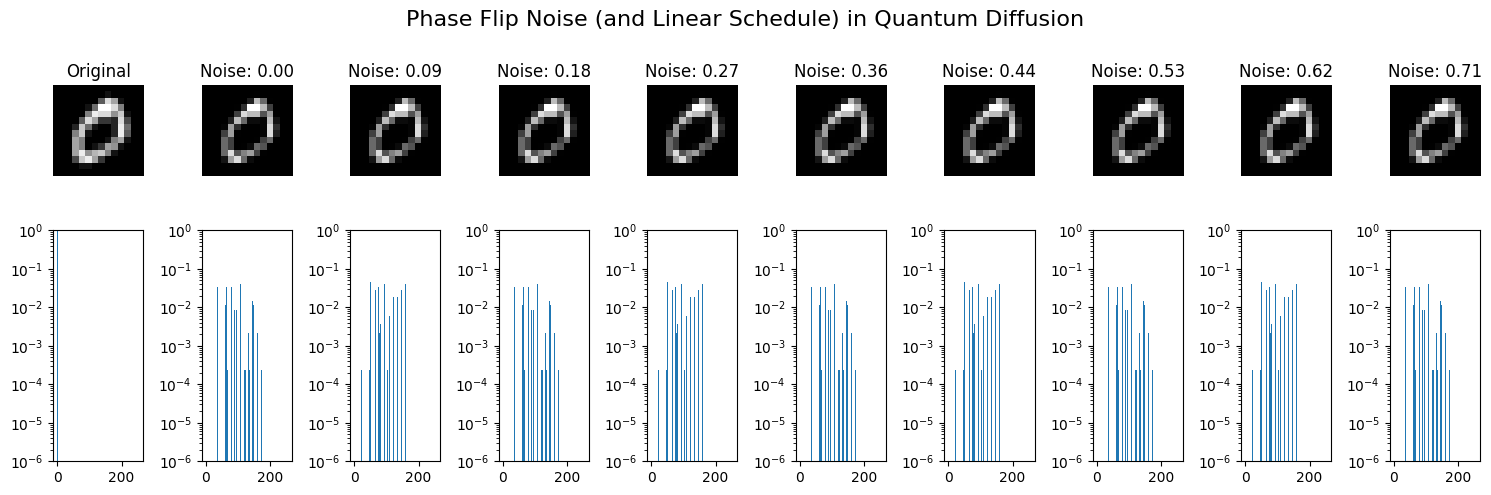

In [ ]:
# Phase Flip - Linear Schedule
#########################################
n_qubits = 8
dev = qml.device("default.mixed", wires=n_qubits)


@qml.qnode(dev)
def quantum_forward_diffusion(features, noise_strength):
    """Apply quantum forward diffusion to input features."""
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    for w in range(n_qubits):
        qml.PhaseFlip(noise_strength, wires=w)

    return qml.probs(wires=range(n_qubits))

def get_noise_schedule(num_steps):
    """Generate noise schedule for diffusion process."""
    # Using linear schedule for visualization clarity
    return np.linspace(0.0, 0.8, num_steps)

#########################################
# Visualization Functions
#########################################
def apply_quantum_diffusion_sequence(image, noise_schedule):
    """Apply quantum diffusion to an image across multiple noise levels."""
    # Flatten and normalize image
    flat_image = image.flatten()

    # Store diffusion steps
    diffused_states = []
    reconstructed_images = []

    # Apply diffusion at each noise level
    for noise_level in noise_schedule:
        # Get quantum state after diffusion
        diffused_state = quantum_forward_diffusion(flat_image, noise_level)
        diffused_states.append(diffused_state)

        # Reconstruct image from quantum state
        # Note: This is a simplified reconstruction for visualization
        reconstructed = np.reshape(diffused_state[:196], (14, 14))  # First 196 amplitudes
        reconstructed = reconstructed / np.max(reconstructed)  # Normalize
        reconstructed_images.append(reconstructed)

    return diffused_states, reconstructed_images

def visualize_quantum_diffusion(original_image, noise_schedule, diffused_states, reconstructed_images):
    """Create a comprehensive visualization of the quantum diffusion process."""
    num_steps = len(noise_schedule)
    fig = plt.figure(figsize=(15, 5))

    # Plot layout: 2 rows x num_steps columns
    gs = fig.add_gridspec(2, num_steps)

    # First row: Image reconstructions
    for i in range(num_steps):
        ax = fig.add_subplot(gs[0, i])
        if i == 0:
            ax.imshow(original_image, cmap='gray')
            ax.set_title('Original')
        else:
            ax.imshow(reconstructed_images[i-1], cmap='gray')
            ax.set_title(f'Noise: {noise_schedule[i-1]:.2f}')
        ax.axis('off')

    # Second row: Quantum state probabilities
    for i in range(num_steps):
        ax = fig.add_subplot(gs[1, i])
        if i == 0:
            # Plot initial state distribution
            initial_state = np.zeros(256)
            initial_state[0] = 1  # Approximate initial state
            ax.bar(range(len(initial_state)), initial_state)
        else:
            ax.bar(range(len(diffused_states[i-1])), diffused_states[i-1])
        #ax.set_ylim(0, 1)
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        # Handle potential zero values for log scale
        ax.set_ylim(1e-6, 1) # Set reasonable bottom limit. Adjust 1e-6 if needed.
        #ax.set_title(f'State Distribution')

    #plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust top for suptitle
    plt.tight_layout()
    fig.suptitle("Phase Flip Noise (and Linear Schedule) in Quantum Diffusion", fontsize=16) # Add the suptitle

    return fig

#########################################
# Run complete
#########################################
def run_quantum_diffusion_visualization(num_steps=10):
    """Run complete quantum diffusion visualization pipeline."""
    # Load and prepare data
    images = load_and_preprocess_mnist()
    sample_image = images[0]  # Take first image

    # Generate noise schedule
    noise_schedule = get_noise_schedule(num_steps)

    # Apply quantum diffusion
    diffused_states, reconstructed_images = apply_quantum_diffusion_sequence(
        sample_image, noise_schedule)

    # Create visualization
    fig = visualize_quantum_diffusion(
        sample_image, noise_schedule, diffused_states, reconstructed_images)

    return fig

# Execute visualization
fig = run_quantum_diffusion_visualization()
plt.show()

*Amplitude Damping - Linear Schedule*

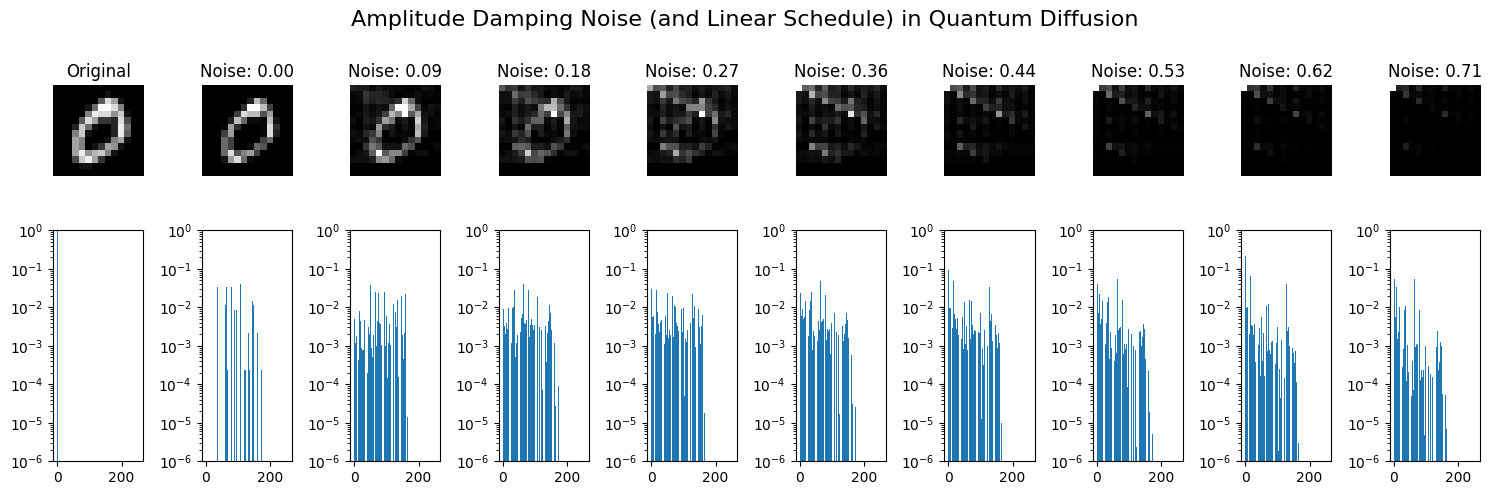

In [ ]:
# Amplitude Damping - Linear Schedule
#########################################
def load_and_preprocess_mnist():
    """Load and preprocess MNIST data for quantum diffusion."""
    (train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

    # Filter for 0 and 1 digits
    train_mask = (train_labels == 0) | (train_labels == 1)
    train_images = train_images[train_mask]

    # Downsample to 14x14
    target_size = (14, 14)
    downsampled = np.zeros((train_images.shape[0], 14, 14), dtype=np.uint8)
    for i, img in enumerate(train_images):
        pil_img = Image.fromarray(img)
        pil_down = pil_img.resize(target_size, resample=Image.BILINEAR)
        downsampled[i] = np.array(pil_down)

    # Quantize and normalize
    quantized = downsampled // 16
    normalized = quantized / np.max(quantized)

    return normalized

#########################################
# Quantum Forward Diffusion
#########################################
n_qubits = 8
dev = qml.device("default.mixed", wires=n_qubits)


@qml.qnode(dev)
def quantum_forward_diffusion(features, noise_strength):
    """Apply quantum forward diffusion to input features."""
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    for w in range(n_qubits):
        qml.AmplitudeDamping(noise_strength, wires=w)

    return qml.probs(wires=range(n_qubits))

def get_noise_schedule(num_steps):
    """Generate noise schedule for diffusion process."""
    # Using linear schedule for visualization clarity
    return np.linspace(0.0, 0.8, num_steps)

#########################################
# Visualization Functions
#########################################
def apply_quantum_diffusion_sequence(image, noise_schedule):
    """Apply quantum diffusion to an image across multiple noise levels."""
    # Flatten and normalize image
    flat_image = image.flatten()

    # Store diffusion steps
    diffused_states = []
    reconstructed_images = []

    # Apply diffusion at each noise level
    for noise_level in noise_schedule:
        # Get quantum state after diffusion
        diffused_state = quantum_forward_diffusion(flat_image, noise_level)
        diffused_states.append(diffused_state)

        # Reconstruct image from quantum state
        # Note: This is a simplified reconstruction for visualization
        reconstructed = np.reshape(diffused_state[:196], (14, 14))  # First 196 amplitudes
        reconstructed = reconstructed / np.max(reconstructed)  # Normalize
        reconstructed_images.append(reconstructed)

    return diffused_states, reconstructed_images

def visualize_quantum_diffusion(original_image, noise_schedule, diffused_states, reconstructed_images):
    """Create a comprehensive visualization of the quantum diffusion process."""
    num_steps = len(noise_schedule)
    fig = plt.figure(figsize=(15, 5))

    # Plot layout: 2 rows x num_steps columns
    gs = fig.add_gridspec(2, num_steps)

    # First row: Image reconstructions
    for i in range(num_steps):
        ax = fig.add_subplot(gs[0, i])
        if i == 0:
            ax.imshow(original_image, cmap='gray')
            ax.set_title('Original')
        else:
            ax.imshow(reconstructed_images[i-1], cmap='gray')
            ax.set_title(f'Noise: {noise_schedule[i-1]:.2f}')
        ax.axis('off')

    # Second row: Quantum state probabilities
    for i in range(num_steps):
        ax = fig.add_subplot(gs[1, i])
        if i == 0:
            # Plot initial state distribution
            initial_state = np.zeros(256)
            initial_state[0] = 1  # Approximate initial state
            ax.bar(range(len(initial_state)), initial_state)
        else:
            ax.bar(range(len(diffused_states[i-1])), diffused_states[i-1])
        #ax.set_ylim(0, 1)
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        # Handle potential zero values for log scale
        ax.set_ylim(1e-6, 1) # Set reasonable bottom limit. Adjust 1e-6 if needed.
        #ax.set_title(f'State Distribution')

    #plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust top for suptitle
    plt.tight_layout()
    fig.suptitle("Amplitude Damping Noise (and Linear Schedule) in Quantum Diffusion", fontsize=16) # Add the suptitle

    return fig

#########################################
# Run complete
#########################################
def run_quantum_diffusion_visualization(num_steps=10):
    """Run complete quantum diffusion visualization pipeline."""
    # Load and prepare data
    images = load_and_preprocess_mnist()
    sample_image = images[0]  # Take first image

    # Generate noise schedule
    noise_schedule = get_noise_schedule(num_steps)

    # Apply quantum diffusion
    diffused_states, reconstructed_images = apply_quantum_diffusion_sequence(
        sample_image, noise_schedule)

    # Create visualization
    fig = visualize_quantum_diffusion(
        sample_image, noise_schedule, diffused_states, reconstructed_images)

    return fig

# Execute visualization
fig = run_quantum_diffusion_visualization()
plt.show()

*Depolarizing Noise - Linear Schedule*

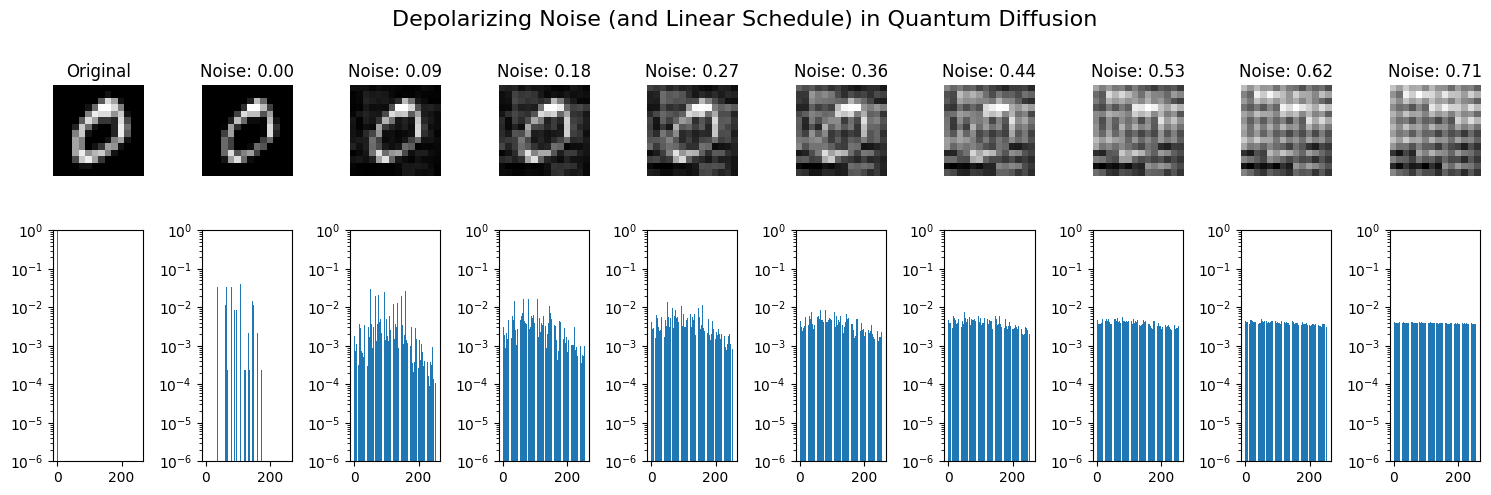

In [ ]:
# Depolarizing Noise - Linear Schedule
#########################################
n_qubits = 8
dev = qml.device("default.mixed", wires=n_qubits)


@qml.qnode(dev)
def quantum_forward_diffusion(features, noise_strength):
    """Apply quantum forward diffusion using depolarizing noise.

    Args:
        features: Input image features (flattened and normalized)
        noise_strength: Depolarizing probability (between 0 and 1)

    Returns:
        Probability distribution after noise application
    """
    # Validate noise parameter
    if not 0 <= noise_strength <= 1:
        raise ValueError(f"Noise strength must be between 0 and 1, got {noise_strength}")

    # Embed classical data into quantum state
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    # Apply depolarizing noise to each qubit
    for w in range(n_qubits):
        qml.DepolarizingChannel(noise_strength, wires=w)

    return qml.probs(wires=range(n_qubits))

def get_noise_schedule(num_steps):
    """Generate noise schedule for diffusion process."""
    # Using linear schedule for visualization clarity
    return np.linspace(0.0, 0.8, num_steps)

#########################################
# Visualization Functions
#########################################
def apply_quantum_diffusion_sequence(image, noise_schedule):
    """Apply quantum diffusion to an image across multiple noise levels."""
    # Flatten and normalize image
    flat_image = image.flatten()

    # Store diffusion steps
    diffused_states = []
    reconstructed_images = []

    # Apply diffusion at each noise level
    for noise_level in noise_schedule:
        # Get quantum state after diffusion
        diffused_state = quantum_forward_diffusion(flat_image, noise_level)
        diffused_states.append(diffused_state)

        # Reconstruct image from quantum state
        # Note: This is a simplified reconstruction for visualization
        reconstructed = np.reshape(diffused_state[:196], (14, 14))  # First 196 amplitudes
        reconstructed = reconstructed / np.max(reconstructed)  # Normalize
        reconstructed_images.append(reconstructed)

    return diffused_states, reconstructed_images

def visualize_quantum_diffusion(original_image, noise_schedule, diffused_states, reconstructed_images):
    """Create a comprehensive visualization of the quantum diffusion process."""
    num_steps = len(noise_schedule)
    fig = plt.figure(figsize=(15, 5))

    # Plot layout: 2 rows x num_steps columns
    gs = fig.add_gridspec(2, num_steps)

    # First row: Image reconstructions
    for i in range(num_steps):
        ax = fig.add_subplot(gs[0, i])
        if i == 0:
            ax.imshow(original_image, cmap='gray')
            ax.set_title('Original')
        else:
            ax.imshow(reconstructed_images[i-1], cmap='gray')
            ax.set_title(f'Noise: {noise_schedule[i-1]:.2f}')
        ax.axis('off')

    # Second row: Quantum state probabilities
    for i in range(num_steps):
        ax = fig.add_subplot(gs[1, i])
        if i == 0:
            # Plot initial state distribution
            initial_state = np.zeros(256)
            initial_state[0] = 1  # Approximate initial state
            ax.bar(range(len(initial_state)), initial_state)
        else:
            ax.bar(range(len(diffused_states[i-1])), diffused_states[i-1])
        #ax.set_ylim(0, 1)
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        # Handle potential zero values for log scale
        ax.set_ylim(1e-6, 1) # Set reasonable bottom limit. Adjust 1e-6 if needed.
        #ax.set_title(f'State Distribution')

    #plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust top for suptitle
    plt.tight_layout()
    fig.suptitle("Depolarizing Noise (and Linear Schedule) in Quantum Diffusion", fontsize=16) # Add the suptitle

    return fig

#########################################
# Run complete
#########################################
def run_quantum_diffusion_visualization(num_steps=10):
    """Run complete quantum diffusion visualization pipeline."""
    # Load and prepare data
    images = load_and_preprocess_mnist()
    sample_image = images[0]  # Take first image

    # Generate noise schedule
    noise_schedule = get_noise_schedule(num_steps)

    # Apply quantum diffusion
    diffused_states, reconstructed_images = apply_quantum_diffusion_sequence(
        sample_image, noise_schedule)

    # Create visualization
    fig = visualize_quantum_diffusion(
        sample_image, noise_schedule, diffused_states, reconstructed_images)

    return fig

# Execute visualization
fig = run_quantum_diffusion_visualization()
plt.show()

*Amplitude Damping - Cosine Schedule*

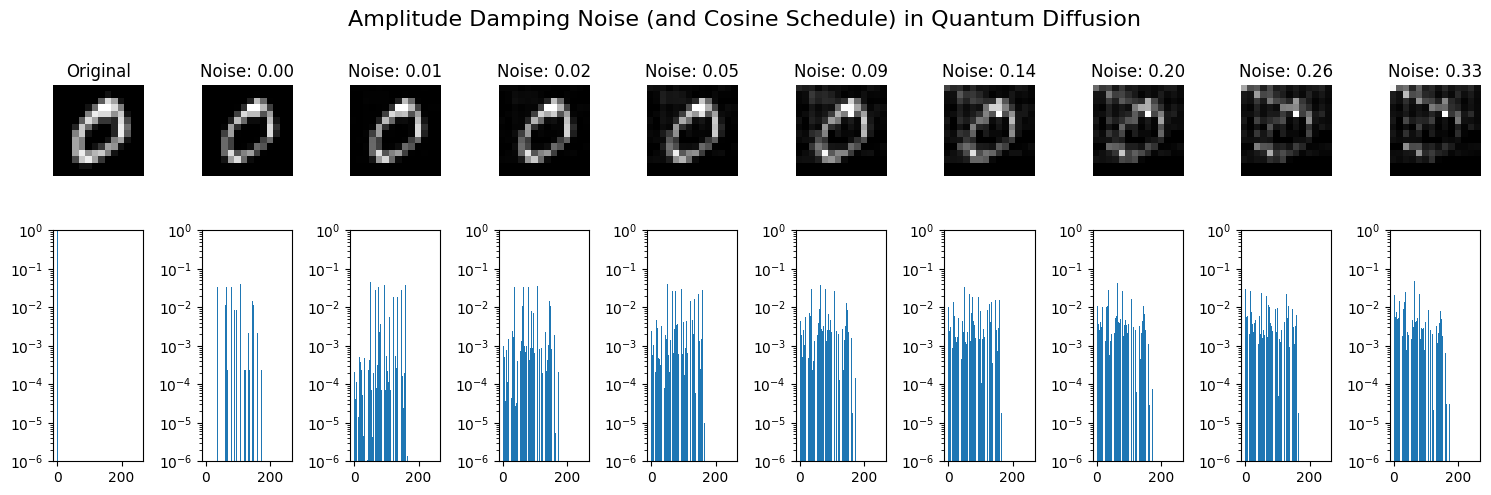

In [ ]:
# Amplitude Damping - Cosine Schedule
#########################################
def load_and_preprocess_mnist():
    """Load and preprocess MNIST data for quantum diffusion."""
    (train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

    # Filter for 0 and 1 digits
    train_mask = (train_labels == 0) | (train_labels == 1)
    train_images = train_images[train_mask]

    # Downsample to 14x14
    target_size = (14, 14)
    downsampled = np.zeros((train_images.shape[0], 14, 14), dtype=np.uint8)
    for i, img in enumerate(train_images):
        pil_img = Image.fromarray(img)
        pil_down = pil_img.resize(target_size, resample=Image.BILINEAR)
        downsampled[i] = np.array(pil_down)

    # Quantize and normalize
    quantized = downsampled // 16
    normalized = quantized / np.max(quantized)

    return normalized

#########################################
# Quantum Forward Diffusion
#########################################
n_qubits = 8
dev = qml.device("default.mixed", wires=n_qubits)


@qml.qnode(dev)
def quantum_forward_diffusion(features, noise_strength):
    """Apply quantum forward diffusion to input features."""
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    for w in range(n_qubits):
        qml.AmplitudeDamping(noise_strength, wires=w)

    return qml.probs(wires=range(n_qubits))

# cosine noise schedule
def get_noise_schedule(num_timesteps, max_noise=0.8):
    """
    Generate a cosine noise schedule with proper progression from low to high noise.

    Args:
        num_timesteps: Number of diffusion steps
        max_noise: Maximum noise value (default 0.8)

    Returns:
        Array of noise values increasing from 0 to max_noise
    """
    steps = np.linspace(0, num_timesteps, num_timesteps)
    # Generate cosine values from 0 to 1
    noise_values = (1 - np.cos(steps / num_timesteps * np.pi * 0.5)) * 0.5
    # Scale to desired range
    noise_values = noise_values * max_noise
    return noise_values

#########################################
# Visualization Functions
#########################################
def apply_quantum_diffusion_sequence(image, noise_schedule):
    """Apply quantum diffusion to an image across multiple noise levels."""
    # Flatten and normalize image
    flat_image = image.flatten()

    # Store diffusion steps
    diffused_states = []
    reconstructed_images = []

    # Apply diffusion at each noise level
    for noise_level in noise_schedule:
        # Get quantum state after diffusion
        diffused_state = quantum_forward_diffusion(flat_image, noise_level)
        diffused_states.append(diffused_state)

        # Reconstruct image from quantum state
        # Note: This is a simplified reconstruction for visualization
        reconstructed = np.reshape(diffused_state[:196], (14, 14))  # First 196 amplitudes
        reconstructed = reconstructed / np.max(reconstructed)  # Normalize
        reconstructed_images.append(reconstructed)

    return diffused_states, reconstructed_images

def visualize_quantum_diffusion(original_image, noise_schedule, diffused_states, reconstructed_images):
    """Create a comprehensive visualization of the quantum diffusion process."""
    num_steps = len(noise_schedule)
    fig = plt.figure(figsize=(15, 5))

    # Plot layout: 2 rows x num_steps columns
    gs = fig.add_gridspec(2, num_steps)

    # First row: Image reconstructions
    for i in range(num_steps):
        ax = fig.add_subplot(gs[0, i])
        if i == 0:
            ax.imshow(original_image, cmap='gray')
            ax.set_title('Original')
        else:
            ax.imshow(reconstructed_images[i-1], cmap='gray')
            ax.set_title(f'Noise: {noise_schedule[i-1]:.2f}')
        ax.axis('off')

    # Second row: Quantum state probabilities
    for i in range(num_steps):
        ax = fig.add_subplot(gs[1, i])
        if i == 0:
            # Plot initial state distribution
            initial_state = np.zeros(256)
            initial_state[0] = 1  # Approximate initial state
            ax.bar(range(len(initial_state)), initial_state)
        else:
            ax.bar(range(len(diffused_states[i-1])), diffused_states[i-1])
        #ax.set_ylim(0, 1)
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        # Handle potential zero values for log scale
        ax.set_ylim(1e-6, 1) # Set reasonable bottom limit. Adjust 1e-6 if needed.
        #ax.set_title(f'State Distribution')

    #plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust top for suptitle
    plt.tight_layout()
    fig.suptitle("Amplitude Damping Noise (and Cosine Schedule) in Quantum Diffusion", fontsize=16) # Add the suptitle

    return fig

#########################################
# Run complete
#########################################
def run_quantum_diffusion_visualization(num_steps=10):
    """Run complete quantum diffusion visualization pipeline."""
    # Load and prepare data
    images = load_and_preprocess_mnist()
    sample_image = images[0]  # Take first image

    # Generate noise schedule
    noise_schedule = get_noise_schedule(num_steps)

    # Apply quantum diffusion
    diffused_states, reconstructed_images = apply_quantum_diffusion_sequence(
        sample_image, noise_schedule)

    # Create visualization
    fig = visualize_quantum_diffusion(
        sample_image, noise_schedule, diffused_states, reconstructed_images)

    return fig

# Execute visualization
fig = run_quantum_diffusion_visualization()
plt.show()

*Depolarizing Noise - Cosine Schedule*

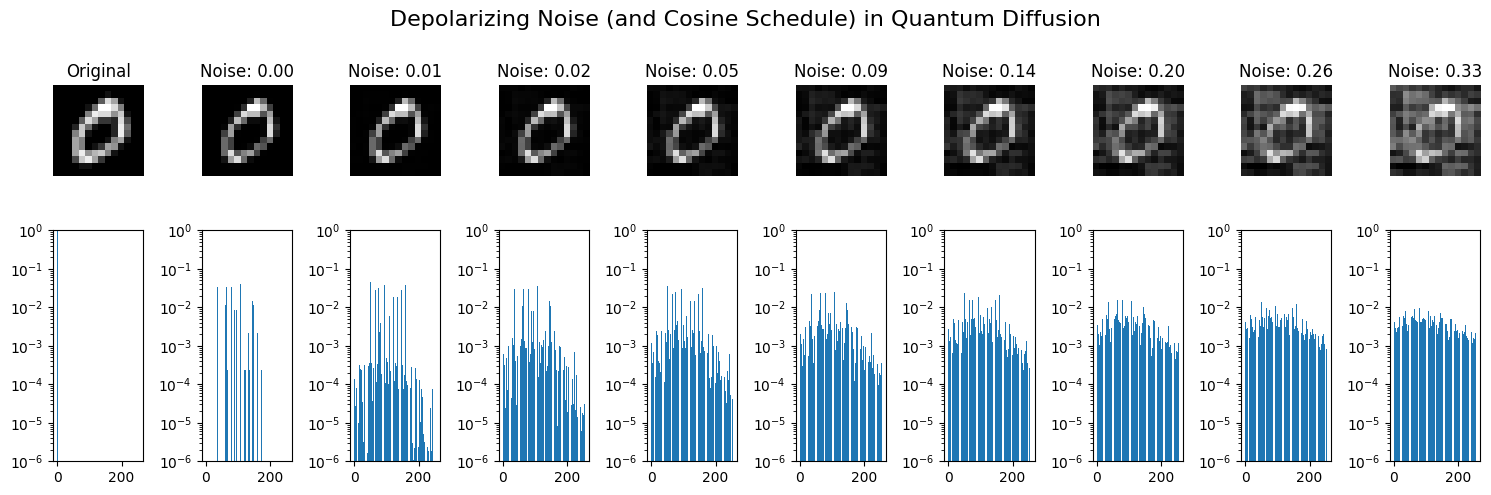

In [ ]:
# Depolarizing Noise - Cosine Schedule
#########################################
def load_and_preprocess_mnist():
    """Load and preprocess MNIST data for quantum diffusion."""
    (train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

    # Filter for 0 and 1 digits
    train_mask = (train_labels == 0) | (train_labels == 1)
    train_images = train_images[train_mask]

    # Downsample to 14x14
    target_size = (14, 14)
    downsampled = np.zeros((train_images.shape[0], 14, 14), dtype=np.uint8)
    for i, img in enumerate(train_images):
        pil_img = Image.fromarray(img)
        pil_down = pil_img.resize(target_size, resample=Image.BILINEAR)
        downsampled[i] = np.array(pil_down)

    # Quantize and normalize
    quantized = downsampled // 16
    normalized = quantized / np.max(quantized)

    return normalized

#########################################
# Quantum Forward Diffusion
#########################################
n_qubits = 8
dev = qml.device("default.mixed", wires=n_qubits)


@qml.qnode(dev)
def quantum_forward_diffusion(features, noise_strength):
    """Apply quantum forward diffusion using depolarizing noise.

    Args:
        features: Input image features (flattened and normalized)
        noise_strength: Depolarizing probability (between 0 and 1)

    Returns:
        Probability distribution after noise application
    """
    # Validate noise parameter
    if not 0 <= noise_strength <= 1:
        raise ValueError(f"Noise strength must be between 0 and 1, got {noise_strength}")

    # Embed classical data into quantum state
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    # Apply depolarizing noise to each qubit
    for w in range(n_qubits):
        qml.DepolarizingChannel(noise_strength, wires=w)

    return qml.probs(wires=range(n_qubits))

# cosine noise schedule
def get_noise_schedule(num_timesteps, max_noise=0.8):
    """
    Generate a cosine noise schedule with proper progression from low to high noise.

    Args:
        num_timesteps: Number of diffusion steps
        max_noise: Maximum noise value (default 0.8)

    Returns:
        Array of noise values increasing from 0 to max_noise
    """
    steps = np.linspace(0, num_timesteps, num_timesteps)
    # Generate cosine values from 0 to 1
    noise_values = (1 - np.cos(steps / num_timesteps * np.pi * 0.5)) * 0.5
    # Scale to desired range
    noise_values = noise_values * max_noise
    return noise_values

#########################################
# Visualization Functions
#########################################
def apply_quantum_diffusion_sequence(image, noise_schedule):
    """Apply quantum diffusion to an image across multiple noise levels."""
    # Flatten and normalize image
    flat_image = image.flatten()

    # Store diffusion steps
    diffused_states = []
    reconstructed_images = []

    # Apply diffusion at each noise level
    for noise_level in noise_schedule:
        # Get quantum state after diffusion
        diffused_state = quantum_forward_diffusion(flat_image, noise_level)
        diffused_states.append(diffused_state)

        # Reconstruct image from quantum state
        # Note: This is a simplified reconstruction for visualization
        reconstructed = np.reshape(diffused_state[:196], (14, 14))  # First 196 amplitudes
        reconstructed = reconstructed / np.max(reconstructed)  # Normalize
        reconstructed_images.append(reconstructed)

    return diffused_states, reconstructed_images

def visualize_quantum_diffusion(original_image, noise_schedule, diffused_states, reconstructed_images):
    """Create a comprehensive visualization of the quantum diffusion process."""
    num_steps = len(noise_schedule)
    fig = plt.figure(figsize=(15, 5))

    # Plot layout: 2 rows x num_steps columns
    gs = fig.add_gridspec(2, num_steps)

    # First row: Image reconstructions
    for i in range(num_steps):
        ax = fig.add_subplot(gs[0, i])
        if i == 0:
            ax.imshow(original_image, cmap='gray')
            ax.set_title('Original')
        else:
            ax.imshow(reconstructed_images[i-1], cmap='gray')
            ax.set_title(f'Noise: {noise_schedule[i-1]:.2f}')
        ax.axis('off')

    # Second row: Quantum state probabilities
    for i in range(num_steps):
        ax = fig.add_subplot(gs[1, i])
        if i == 0:
            # Plot initial state distribution
            initial_state = np.zeros(256)
            initial_state[0] = 1  # Approximate initial state
            ax.bar(range(len(initial_state)), initial_state)
        else:
            ax.bar(range(len(diffused_states[i-1])), diffused_states[i-1])
        #ax.set_ylim(0, 1)
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        # Handle potential zero values for log scale
        ax.set_ylim(1e-6, 1) # Set reasonable bottom limit. Adjust 1e-6 if needed.
        #ax.set_title(f'State Distribution')

    #plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust top for suptitle
    plt.tight_layout()
    fig.suptitle("Depolarizing Noise (and Cosine Schedule) in Quantum Diffusion", fontsize=16) # Add the suptitle

    return fig

#########################################
# Run complete
#########################################
def run_quantum_diffusion_visualization(num_steps=10):
    """Run complete quantum diffusion visualization pipeline."""
    # Load and prepare data
    images = load_and_preprocess_mnist()
    sample_image = images[0]  # Take first image

    # Generate noise schedule
    noise_schedule = get_noise_schedule(num_steps)

    # Apply quantum diffusion
    diffused_states, reconstructed_images = apply_quantum_diffusion_sequence(
        sample_image, noise_schedule)

    # Create visualization
    fig = visualize_quantum_diffusion(
        sample_image, noise_schedule, diffused_states, reconstructed_images)

    return fig

# Execute visualization
fig = run_quantum_diffusion_visualization()
plt.show()

*Phase Flip and Cosine Schedule*

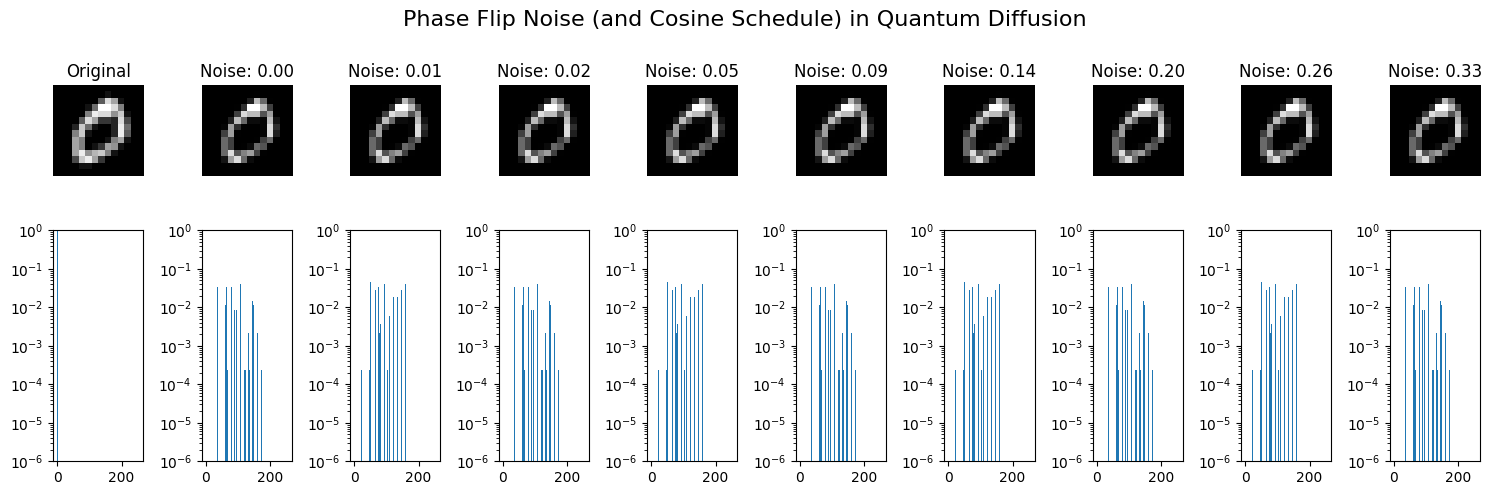

In [ ]:
# Phase Flip and Cosine Schedule
#########################################
def load_and_preprocess_mnist():
    """Load and preprocess MNIST data for quantum diffusion."""
    (train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

    # Filter for 0 and 1 digits
    train_mask = (train_labels == 0) | (train_labels == 1)
    train_images = train_images[train_mask]

    # Downsample to 14x14
    target_size = (14, 14)
    downsampled = np.zeros((train_images.shape[0], 14, 14), dtype=np.uint8)
    for i, img in enumerate(train_images):
        pil_img = Image.fromarray(img)
        pil_down = pil_img.resize(target_size, resample=Image.BILINEAR)
        downsampled[i] = np.array(pil_down)

    # Quantize and normalize
    quantized = downsampled // 16
    normalized = quantized / np.max(quantized)

    return normalized

#########################################
# Quantum Forward Diffusion
#########################################
n_qubits = 8
dev = qml.device("default.mixed", wires=n_qubits)


@qml.qnode(dev)
def quantum_forward_diffusion(features, noise_strength):
    """Apply quantum forward diffusion to input features."""
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    for w in range(n_qubits):
        qml.PhaseFlip(noise_strength, wires=w)

    return qml.probs(wires=range(n_qubits))

# cosine noise schedule
def get_noise_schedule(num_timesteps, max_noise=0.8):
    """
    Generate a cosine noise schedule with proper progression from low to high noise.

    Args:
        num_timesteps: Number of diffusion steps
        max_noise: Maximum noise value (default 0.8)

    Returns:
        Array of noise values increasing from 0 to max_noise
    """
    steps = np.linspace(0, num_timesteps, num_timesteps)
    # Generate cosine values from 0 to 1
    noise_values = (1 - np.cos(steps / num_timesteps * np.pi * 0.5)) * 0.5
    # Scale to desired range
    noise_values = noise_values * max_noise
    return noise_values

#########################################
# Visualization Functions
#########################################
def apply_quantum_diffusion_sequence(image, noise_schedule):
    """Apply quantum diffusion to an image across multiple noise levels."""
    # Flatten and normalize image
    flat_image = image.flatten()

    # Store diffusion steps
    diffused_states = []
    reconstructed_images = []

    # Apply diffusion at each noise level
    for noise_level in noise_schedule:
        # Get quantum state after diffusion
        diffused_state = quantum_forward_diffusion(flat_image, noise_level)
        diffused_states.append(diffused_state)

        # Reconstruct image from quantum state
        # Note: This is a simplified reconstruction for visualization
        reconstructed = np.reshape(diffused_state[:196], (14, 14))  # First 196 amplitudes
        reconstructed = reconstructed / np.max(reconstructed)  # Normalize
        reconstructed_images.append(reconstructed)

    return diffused_states, reconstructed_images

def visualize_quantum_diffusion(original_image, noise_schedule, diffused_states, reconstructed_images):
    """Create a comprehensive visualization of the quantum diffusion process."""
    num_steps = len(noise_schedule)
    fig = plt.figure(figsize=(15, 5))

    # Plot layout: 2 rows x num_steps columns
    gs = fig.add_gridspec(2, num_steps)

    # First row: Image reconstructions
    for i in range(num_steps):
        ax = fig.add_subplot(gs[0, i])
        if i == 0:
            ax.imshow(original_image, cmap='gray')
            ax.set_title('Original')
        else:
            ax.imshow(reconstructed_images[i-1], cmap='gray')
            ax.set_title(f'Noise: {noise_schedule[i-1]:.2f}')
        ax.axis('off')

    # Second row: Quantum state probabilities
    for i in range(num_steps):
        ax = fig.add_subplot(gs[1, i])
        if i == 0:
            # Plot initial state distribution
            initial_state = np.zeros(256)
            initial_state[0] = 1  # Approximate initial state
            ax.bar(range(len(initial_state)), initial_state)
        else:
            ax.bar(range(len(diffused_states[i-1])), diffused_states[i-1])
        #ax.set_ylim(0, 1)
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        # Handle potential zero values for log scale
        ax.set_ylim(1e-6, 1) # Set reasonable bottom limit. Adjust 1e-6 if needed.
        #ax.set_title(f'State Distribution')

    #plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust top for suptitle
    plt.tight_layout()
    fig.suptitle("Phase Flip Noise (and Cosine Schedule) in Quantum Diffusion", fontsize=16) # Add the suptitle

    return fig

#########################################
# Run complete
#########################################
def run_quantum_diffusion_visualization(num_steps=10):
    """Run complete quantum diffusion visualization pipeline."""
    # Load and prepare data
    images = load_and_preprocess_mnist()
    sample_image = images[0]  # Take first image

    # Generate noise schedule
    noise_schedule = get_noise_schedule(num_steps)

    # Apply quantum diffusion
    diffused_states, reconstructed_images = apply_quantum_diffusion_sequence(
        sample_image, noise_schedule)

    # Create visualization
    fig = visualize_quantum_diffusion(
        sample_image, noise_schedule, diffused_states, reconstructed_images)

    return fig

# Execute visualization
fig = run_quantum_diffusion_visualization()
plt.show()

*Bit Flip - Cosine Schedule*

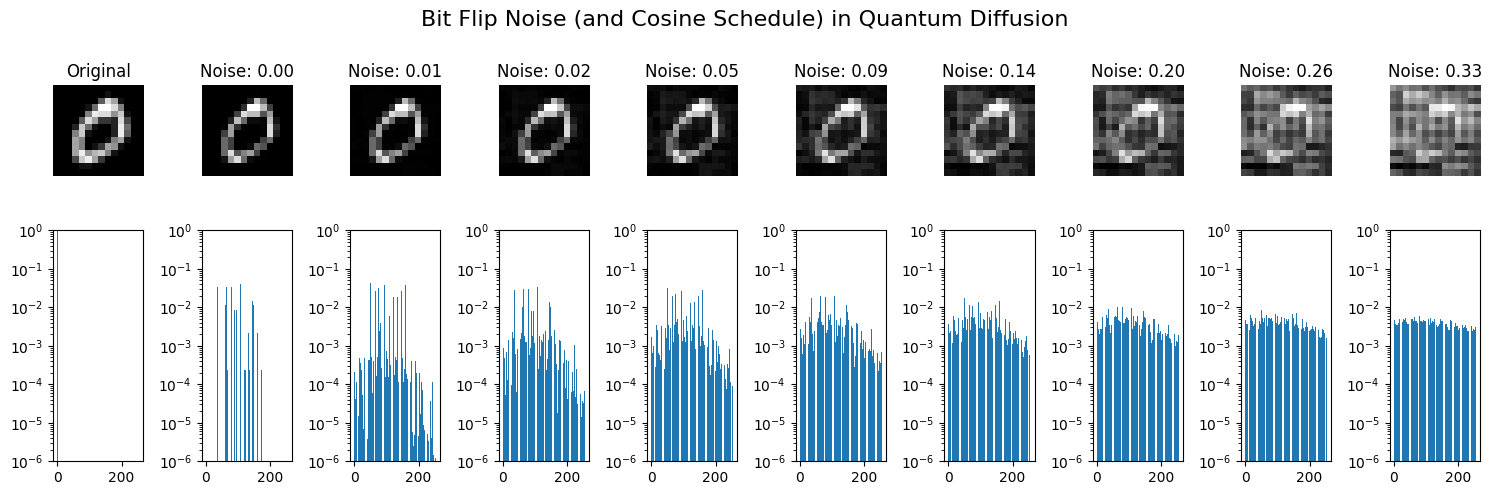

In [ ]:
# Bit Flip - Cosine Schedule
#########################################
def load_and_preprocess_mnist():
    """Load and preprocess MNIST data for quantum diffusion."""
    (train_images, train_labels), _ = tf.keras.datasets.mnist.load_data()

    # Filter for 0 and 1 digits
    train_mask = (train_labels == 0) | (train_labels == 1)
    train_images = train_images[train_mask]

    # Downsample to 14x14
    target_size = (14, 14)
    downsampled = np.zeros((train_images.shape[0], 14, 14), dtype=np.uint8)
    for i, img in enumerate(train_images):
        pil_img = Image.fromarray(img)
        pil_down = pil_img.resize(target_size, resample=Image.BILINEAR)
        downsampled[i] = np.array(pil_down)

    # Quantize and normalize
    quantized = downsampled // 16
    normalized = quantized / np.max(quantized)

    return normalized

#########################################
# Quantum Forward Diffusion
#########################################
n_qubits = 8
dev = qml.device("default.mixed", wires=n_qubits)


@qml.qnode(dev)
def quantum_forward_diffusion(features, noise_strength):
    """Apply quantum forward diffusion using bit flip noise.

    Args:
        features: Input image features (flattened and normalized)
        noise_strength: Bit flip probability (between 0 and 1)

    Returns:
        Probability distribution after noise application
    """
    # Validate noise parameter
    if not 0 <= noise_strength <= 1:
        raise ValueError(f"Noise strength must be between 0 and 1, got {noise_strength}")

    # Embed classical data into quantum state
    qml.AmplitudeEmbedding(
        features,
        wires=range(n_qubits),
        pad_with=0.0,
        normalize=True)

    # Apply bit flip noise to each qubit
    for w in range(n_qubits):
        qml.BitFlip(noise_strength, wires=w)

    return qml.probs(wires=range(n_qubits))

# cosine noise schedule
def get_noise_schedule(num_timesteps, max_noise=0.8):
    """
    Generate a cosine noise schedule with proper progression from low to high noise.

    Args:
        num_timesteps: Number of diffusion steps
        max_noise: Maximum noise value (default 0.8)

    Returns:
        Array of noise values increasing from 0 to max_noise
    """
    steps = np.linspace(0, num_timesteps, num_timesteps)
    # Generate cosine values from 0 to 1
    noise_values = (1 - np.cos(steps / num_timesteps * np.pi * 0.5)) * 0.5
    # Scale to desired range
    noise_values = noise_values * max_noise
    return noise_values

#########################################
# Visualization Functions
#########################################
def apply_quantum_diffusion_sequence(image, noise_schedule):
    """Apply quantum diffusion to an image across multiple noise levels."""
    # Flatten and normalize image
    flat_image = image.flatten()

    # Store diffusion steps
    diffused_states = []
    reconstructed_images = []

    # Apply diffusion at each noise level
    for noise_level in noise_schedule:
        # Get quantum state after diffusion
        diffused_state = quantum_forward_diffusion(flat_image, noise_level)
        diffused_states.append(diffused_state)

        # Reconstruct image from quantum state
        # Note: This is a simplified reconstruction for visualization
        reconstructed = np.reshape(diffused_state[:196], (14, 14))  # First 196 amplitudes
        reconstructed = reconstructed / np.max(reconstructed)  # Normalize
        reconstructed_images.append(reconstructed)

    return diffused_states, reconstructed_images

def visualize_quantum_diffusion(original_image, noise_schedule, diffused_states, reconstructed_images):
    """Create a comprehensive visualization of the quantum diffusion process."""
    num_steps = len(noise_schedule)
    fig = plt.figure(figsize=(15, 5))

    # Plot layout: 2 rows x num_steps columns
    gs = fig.add_gridspec(2, num_steps)

    # First row: Image reconstructions
    for i in range(num_steps):
        ax = fig.add_subplot(gs[0, i])
        if i == 0:
            ax.imshow(original_image, cmap='gray')
            ax.set_title('Original')
        else:
            ax.imshow(reconstructed_images[i-1], cmap='gray')
            ax.set_title(f'Noise: {noise_schedule[i-1]:.2f}')
        ax.axis('off')

    # Second row: Quantum state probabilities
    for i in range(num_steps):
        ax = fig.add_subplot(gs[1, i])
        if i == 0:
            # Plot initial state distribution
            initial_state = np.zeros(256)
            initial_state[0] = 1  # Approximate initial state
            ax.bar(range(len(initial_state)), initial_state)
        else:
            ax.bar(range(len(diffused_states[i-1])), diffused_states[i-1])
        #ax.set_ylim(0, 1)
        ax.set_yscale('log')  # Set y-axis to logarithmic scale
        # Handle potential zero values for log scale
        ax.set_ylim(1e-6, 1) # Set reasonable bottom limit. Adjust 1e-6 if needed.
        #ax.set_title(f'State Distribution')

    #plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust top for suptitle
    plt.tight_layout()
    fig.suptitle("Bit Flip Noise (and Cosine Schedule) in Quantum Diffusion", fontsize=16) # Add the suptitle

    return fig

#########################################
# Run complete
#########################################
def run_quantum_diffusion_visualization(num_steps=10):
    """Run complete quantum diffusion visualization pipeline."""
    # Load and prepare data
    images = load_and_preprocess_mnist()
    sample_image = images[0]  # Take first image

    # Generate noise schedule
    noise_schedule = get_noise_schedule(num_steps)

    # Apply quantum diffusion
    diffused_states, reconstructed_images = apply_quantum_diffusion_sequence(
        sample_image, noise_schedule)

    # Create visualization
    fig = visualize_quantum_diffusion(
        sample_image, noise_schedule, diffused_states, reconstructed_images)

    return fig

# Execute visualization
fig = run_quantum_diffusion_visualization()
plt.show()